# BoardGameGeek Model Building
## Using scraped data from BoardGameGeek.com to predict a new game's rank
-------------
### Tim Dooley (LASSO) Metis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [412]:
df = pd.read_csv('data/bgg.csv')

In [3]:
df.avgweight=df.avgweight.astype(float)

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 108 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 10019 non-null  object 
 1   rank                 10019 non-null  float64
 2   desc                 10019 non-null  object 
 3   geek                 10019 non-null  float64
 4   rating               10019 non-null  float64
 5   num_voters           10019 non-null  int64  
 6   price                10019 non-null  object 
 7   average              10019 non-null  object 
 8   avgweight            10019 non-null  float64
 9   baverage             10019 non-null  float64
 10  maxplayers           10018 non-null  float64
 11  maxplaytime          10018 non-null  float64
 12  minage               10018 non-null  float64
 13  minplayers           10018 non-null  float64
 14  minplaytime          10018 non-null  float64
 15  numcomments          10019 non-null

In [5]:
df.sort_values(by='rank')

link     rank  \
7073                       /boardgame/174430/gloomhaven      1.0   
1073         /boardgame/161936/pandemic-legacy-season-1      2.0   
2717                 /boardgame/224517/brass-birmingham      3.0   
7831                /boardgame/167791/terraforming-mars      4.0   
1634  /boardgame/233078/twilight-imperium-fourth-edi...      5.0   
...                                                 ...      ...   
4878                     /boardgame/143674/give-me-five   9996.0   
7717                     /boardgame/11632/gute-nachbarn   9997.0   
2119              /boardgame/244716/machi-koro-fussball   9998.0   
9483                      /boardgame/268665/suzume-jong   9999.0   
6860                   /boardgame/307862/dollars-donuts  10000.0   

                                                   desc   geek  rating  \
7073  Gloomhaven\n(2017)\n\n\n\t\t\tVanquish monster...  8.566    8.81   
1073  Pandemic Legacy: Season 1\n(2015)\n\n\n\t\t\tM...  8.469    8.62   
2717  Brass: Birmingham\n(2018)\n\n\n\t\t\tBuild you...  8.318    8.64   
7831  Terraforming Mars\n(2016)\n\n\n\t\t\tCompete w...  8.282    8.43   
1634  Twilight Imperium (Fourth Edition)\n(2017)\n\n...  8.221    8.69   
...                                                 ...    ...     ...   
4878                               Give Me Five\n(2013)  5.547    6.51   
7717                              Gute Nachbarn\n(1986)  5.547    6.41   
2119                        Machi Koro Fussball\n(2018)  5.546    6.64   
9483                                Suzume-Jong\n(2018)  5.546    6.93   
6860  Dollars to Donuts\n(2020)\n\n\n\t\t\tPlay tile...  5.546    7.94   

      num_voters                                              price  average  \
7073       38040  /boardgame/174430/gloomhaven/marketplace/geekm...  8.81498   
1073       39014  /boardgame/161936/pandemic-legacy-season-1/mar...  8.61919   
2717       15489  /boardgame/224517/brass-birmingham/marketplace...  8.64397   
7831       58812  /boardgame/167791/terraforming-mars/marketplac...   8.4315   
1634       11926  /boardgame/233078/twilight-imperium-fourth-edi...  8.68962   
...          ...                                                ...      ...   
4878          71  /boardgame/143674/give-me-five/marketplace/gee...   6.5107   
7717          77  /boardgame/11632/gute-nachbarn/marketplace/gee...  6.41078   
2119          63  /boardgame/244716/machi-koro-fussball/marketpl...  6.64032   
9483          53  /boardgame/268665/suzume-jong/marketplace/geek...  6.93019   
6860          41  /boardgame/307862/dollars-donuts/marketplace/g...   7.9378   

      avgweight  baverage  ...  price_mkt_pub     views_pub  strategy_war_pub  \
7073     3.8442   8.56626  ...      87.406667  2.323128e+06          1.000000   
1073     2.8318   8.46856  ...      51.080526  3.629387e+05          0.547170   
2717     3.9191   8.31781  ...      42.106000  5.054896e+05          0.636364   
7831     3.2357   8.28199  ...      42.866667  9.597880e+05          0.666667   
1634     4.2109   8.22085  ...     110.957143  8.985582e+05          0.407407   
...         ...       ...  ...            ...           ...               ...   
4878     1.0000   5.54653  ...      15.500000  2.227857e+04          0.142857   
7717     1.1429   5.54653  ...            NaN  1.770900e+04          0.000000   
2119     0.0000   5.54647  ...      30.072340  1.807898e+05          0.512397   
9483     2.0000   5.54645  ...            NaN  3.677000e+03          0.000000   
6860     2.0000   5.54644  ...            NaN  4.121700e+04          0.000000   

      strategy_pub  family_pub  thematic_pub   war_pub  party_pub  \
7073      1.000000    0.000000      0.400000  0.000000   0.000000   
1073      0.452830    0.396226      0.245283  0.094340   0.037736   
2717      0.363636    0.272727      0.181818  0.272727   0.000000   
7831      0.666667    0.000000      0.500000  0.166667   0.000000   
1634      0.268519    0.037037      0.592593  0.138889   0.009259 

In [6]:
df.price_mkt.describe()

count    3332.000000
mean       50.676516
std        54.082148
min         0.990000
25%        20.975000
50%        36.000000
75%        60.000000
max       850.000000
Name: price_mkt, dtype: float64

In [7]:
df=df[df.yearpublished.notna()]

In [8]:
df['yearpublished_dt'] = pd.to_datetime(df.yearpublished, format = '%Y', errors='coerce')
df['yearpublished'] = df['yearpublished'].astype(float)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 109 columns):
 #   Column               Dtype         
---  ------               -----         
 0   link                 object        
 1   rank                 float64       
 2   desc                 object        
 3   geek                 float64       
 4   rating               float64       
 5   num_voters           int64         
 6   price                object        
 7   average              object        
 8   avgweight            float64       
 9   baverage             float64       
 10  maxplayers           float64       
 11  maxplaytime          float64       
 12  minage               float64       
 13  minplayers           float64       
 14  minplaytime          float64       
 15  numcomments          float64       
 16  numfans              float64       
 17  numgeeklists         float64       
 18  numhasparts          float64       
 19  numowned             flo

## Distribution of two Rating Metrics
BGG has multiple rating metrics. The purpose of this study is to better understand what impacts a game's ranking (which is of course a uniform distribution)

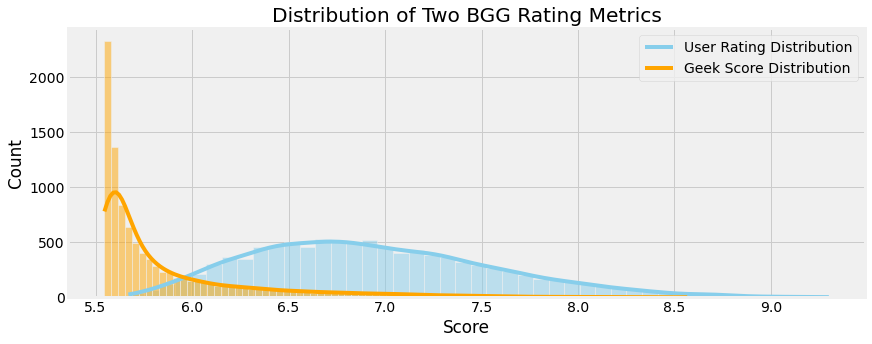

In [9]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Two BGG Rating Metrics')
plt.xlabel('Score')
plt.tight_layout()
sns.histplot(df.rating, color = 'skyblue', kde=True)
sns_plot = sns.histplot(df.geek, color ='orange', kde=True)
plt.legend(['User Rating Distribution' ,'Geek Score Distribution']).figure.savefig("graphs/distributions.png")

## Feature Engineering 
### Deviation Feature
Let's observe how an individual game's rating deviates from the mean of its designer and publisher

In [10]:
df['diff_des'] = df['rating'] - df['rating_des']
df['diff_pub'] = df['rating'] - df['rating_pub']

In [11]:
df['quality_des'] = np.where(df['diff_des']>=0, 1, 0)
df['quality_pub'] = np.where(df['diff_pub']>=0, 1, 0)


#df['quality_des'] = np.where(df['diff_des']<0, -1, df.diff_des)

In [12]:
df.quality_des, df.quality_pub

(0        1
 1        1
 2        0
 3        1
 4        0
         ..
 10014    1
 10015    1
 10016    1
 10017    1
 10018    1
 Name: quality_des, Length: 10018, dtype: int64,
 0        1
 1        1
 2        0
 3        1
 4        0
         ..
 10014    1
 10015    1
 10016    1
 10017    1
 10018    1
 Name: quality_pub, Length: 10018, dtype: int64)

In [13]:
time_sorted = df.sort_values(by='yearpublished_dt')
time_sorted.tail()

link    rank  \
9491                          /boardgame/156878/tummple  6382.0   
9571                       /boardgame/24207/burger-quiz  6905.0   
9695      /boardgame/158876/british-vs-pirates-volume-1  7695.0   
9952  /boardgame/194777/rabbit-island-explore-build-...  9561.0   
9970             /boardgame/175327/wrathborne-champions  9658.0   

                                                   desc   geek  rating  \
9491  tummple!\n\n\n\t\t\tBuilding a delicate tower ...  5.615    6.49   
9571                                        Burger Quiz  5.600    6.69   
9695                       British Vs Pirates: Volume 1  5.581    7.36   
9952            Rabbit Island: Explore, Build, Conquer!  5.552    7.17   
9970                               Wrathborne Champions  5.550    7.52   

      num_voters                                              price  average  \
9491         210   /boardgame/156878/tummple/marketplace/geekmarket   6.4941   
9571         149  /boardgame/24207/burger-quiz/marketplace/geekm...  6.69376   
9695          84  /boardgame/158876/british-vs-pirates-volume-1/...  7.36226   
9952          49  /boardgame/194777/rabbit-island-explore-build-...  7.16735   
9970          50  /boardgame/175327/wrathborne-champions/marketp...     7.52   

      avgweight  baverage  ...  thematic_pub  war_pub  party_pub  \
9491        1.0   5.61509  ...           0.0      1.0        0.0   
9571        1.8   5.59990  ...           0.0      0.5        0.0   
9695        2.5   5.58100  ...           0.0      0.0        0.0   
9952        2.0   5.55162  ...           0.0      1.0        0.0   
9970        2.0   5.55026  ...           0.0      1.0        0.0   

      abstract_pub  numpub  yearpublished_dt  diff_des  diff_pub  quality_des  \
9491           0.0     1.0               NaT       0.0     0.000            1   
9571           0.5     2.0               NaT       0.0     0.195            1   
9695           0.0     1.0               NaT       0.0     0.000            1   
9952           0.0     1.0               NaT       0.0     0.000            1   
9970           0.0     1.0               NaT       0.0     0.000            1   

      quality_pub  
9491            1  
9571            1  
9695            1  
9952            1  
9970            1  

[5 rows x 113 columns]

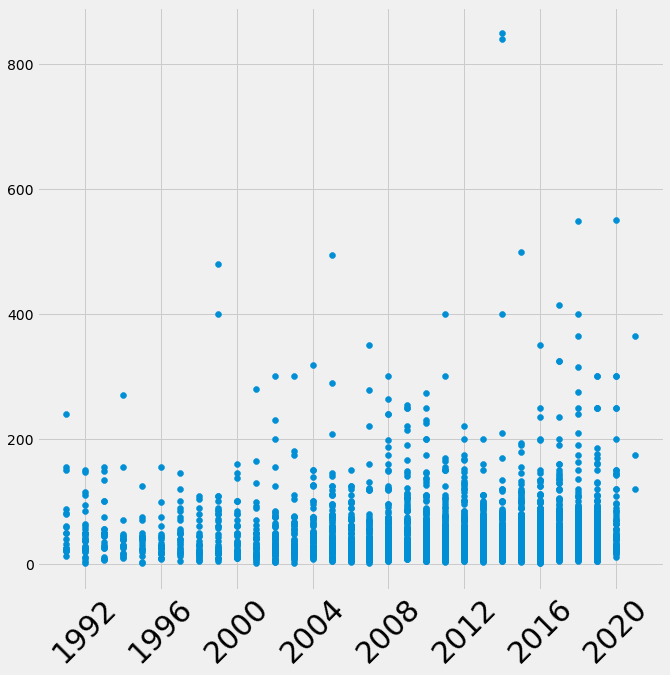

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(time_sorted[time_sorted.yearpublished_dt > '1990'].yearpublished_dt, time_sorted[time_sorted.yearpublished_dt > '1990'].price_mkt)
plt.xticks(size = 30, rotation = 45);

#### Warning
The following looks only at places where `df.price_mkt` is not null, leaving about 3300/10,000

In [15]:
df_price = df.copy()
df_price.loc[df['price_mkt'].isnull(), 'price_mkt'] = df['walmart_price']
df_price= df[df['price_mkt'].notna()]
df_price = df_price[df_price.price_mkt < 150]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 10016
Columns: 113 entries, link to quality_pub
dtypes: datetime64[ns](1), float64(93), int64(10), object(9)
memory usage: 2.8+ MB


In [16]:
smaller_price = df_price[['rating', 'price_mkt','avgweight','strategy_war', 'family', 'abstract', 'rating_des', 'rating_pub']]

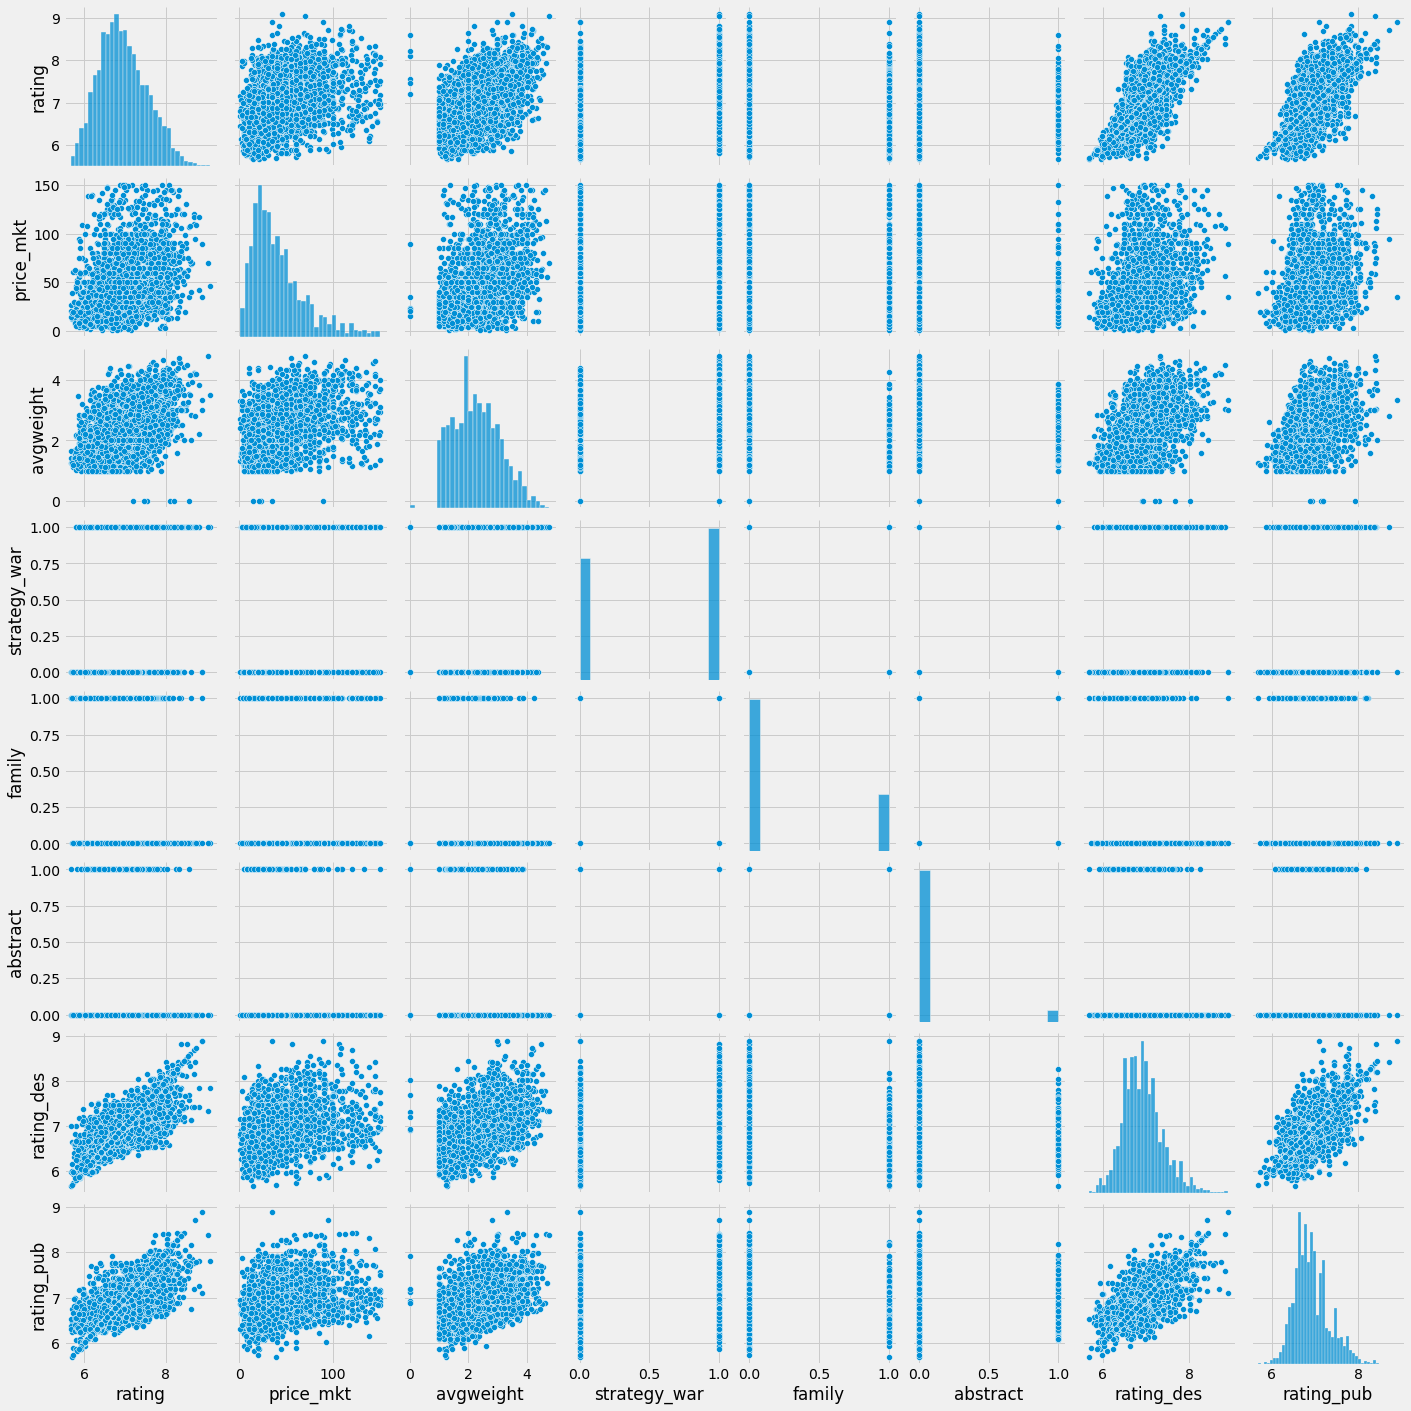

In [17]:
sns.pairplot(smaller_price)

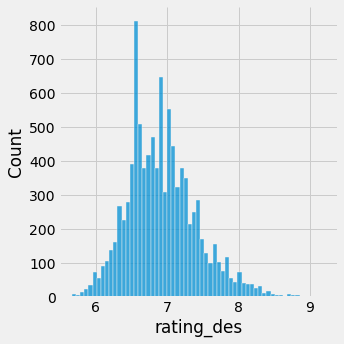

In [18]:
sns.displot(df['rating_des'])

In [19]:
df[df.rating_des == df.rating_des.min()].designer

3721           Roy Parsons
6669    William Stephenson
Name: designer, dtype: object

In [20]:
df[df.price_mkt == df.price_mkt.median()]

link    rank  \
1679              /boardgame/15510/tower-babel  1727.0   
3554               /boardgame/29382/rock-marne  7205.0   
3607        /boardgame/21920/leonardo-da-vinci  1264.0   
4345                    /boardgame/121409/1969  5131.0   
5070  /boardgame/164812/roll-it-deluxe-edition  2092.0   
8025                    /boardgame/64/joan-arc  5269.0   
8499       /boardgame/178944/battalia-creation  2416.0   
9519          /boardgame/175023/crows-overkill  6520.0   

                                                   desc   geek  rating  \
1679                             Tower of Babel\n(2005)  6.175    6.62   
3554                          Rock of the Marne\n(2008)  5.592    6.69   
3607                          Leonardo da Vinci\n(2006)  6.358    6.76   
4345                                       1969\n(2012)  5.669    6.36   
5070                Roll For It! Deluxe Edition\n(2014)  6.062    6.63   
8025                                Joan of Arc\n(1998)  5.662    6.28   
8499                     BATTALIA: The Creation\n(2015)  5.988    7.44   
9519  Crows Overkill\n(2014)\n\n\n\t\t\tKill birds t...  5.611    6.42   

      num_voters                                              price  average  \
1679        2258  /boardgame/15510/tower-babel/marketplace/geekm...  6.62499   
3554         134  /boardgame/29382/rock-marne/marketplace/geekma...  6.69478   
3607        3354  /boardgame/21920/leonardo-da-vinci/marketplace...  6.76061   
4345         406      /boardgame/121409/1969/marketplace/geekmarket  6.35611   
5070        1794  /boardgame/164812/roll-it-deluxe-edition/marke...  6.62909   
8025         434      /boardgame/64/joan-arc/marketplace/geekmarket  6.27767   
8499         805  /boardgame/178944/battalia-creation/marketplac...   7.4427   
9519         223  /boardgame/175023/crows-overkill/marketplace/g...  6.41614   

      avgweight  baverage  ...  thematic_pub   war_pub  party_pub  \
1679     2.3344   6.17461  ...      0.000000  0.072464   0.014493   
3554     2.4348   5.59227  ...      0.000000  1.000000   0.000000   
3607     3.1864   6.35799  ...      0.172414  0.241379   0.206897   
4345     2.2941   5.66871  ...      0.000000  0.000000   0.000000   
5070     1.0984   6.06210  ...      0.076923  0.153846   0.076923   
8025     2.5424   5.66230  ...      0.021277  1.000000   0.000000   
8499     3.4857   5.98804  ...      0.000000  0.000000   0.000000   
9519     1.1429   5.61080  ...      0.000000  0.000000   0.000000   

      abstract_pub  numpub  yearpublished_dt  diff_des  diff_pub  quality_des  \
1679      0.072464    69.0        2005-01-01  0.078811 -0.283043            1   
3554      0.000000    64.0        2008-01-01 -0.065000 -1.035625            0   
3607      0.000000    29.0        2006-01-01 -0.364286  0.097931            0   
4345      0.000000     2.0        2012-01-01 -0.333333 -0.190000            0   
5070      0.230769    13.0        2014-01-01  0.185000  0.019231            1   
8025      0.000000    47.0        1998-01-01 -0.548889 -1.301489            0   
8499      0.000000     1.0        2015-01-01  0.000000  0.000000            1   
9519      0.000000     1.0        2014-01-01  0.000000  0.000000            1   

      quality_pub  
1679            0  
3554            0  
3607            1  
4345            0  
5070            1  
8025            0  
8499            1  
9519            1  

[8 rows x 113 columns]

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.impute import SimpleImputer

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Try with mean for NA
Using fillna with mean to check coefficients before finally choosing features from main DF. 

In [23]:
avg_nan = df.fillna(df.mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [24]:
lr = LinearRegression()

X = avg_nan[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]

y = avg_nan['price_mkt']
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.059145123107722575,
 array([ 5.97557735, -1.99056094, -1.40524309, -2.94168817,  8.02477399,
         1.88696268,  5.34206322]))

In [25]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [26]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

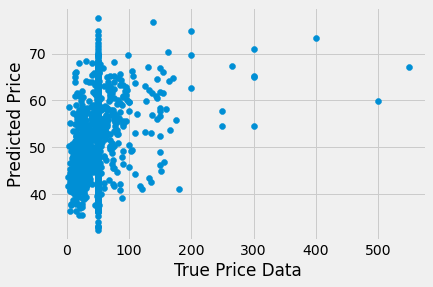

In [27]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**The above shows the problem with simply filling by mean**
There is a vertical line seen where the mean is. A different method should be used. 

### Let's try imputing 0.99 (the min price) for NaN

In [28]:
min_na = df.fillna(df.min())
#min_na.loc[df['price_mkt'].isnull(),'price_mkt']=df.price_mkt.min()
#min_na.
min_na.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 113 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   link                 10018 non-null  object        
 1   rank                 10018 non-null  float64       
 2   desc                 10018 non-null  object        
 3   geek                 10018 non-null  float64       
 4   rating               10018 non-null  float64       
 5   num_voters           10018 non-null  int64         
 6   price                10018 non-null  object        
 7   average              10018 non-null  object        
 8   avgweight            10018 non-null  float64       
 9   baverage             10018 non-null  float64       
 10  maxplayers           10018 non-null  float64       
 11  maxplaytime          10018 non-null  float64       
 12  minage               10018 non-null  float64       
 13  minplayers           10018 non

In [29]:
lr = LinearRegression()

X = min_na[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]

y = min_na[['price_mkt']]
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.05448419921751535,
 array([[ 8.66841558, -4.60716217,  1.72988932, -6.77492981,  9.86843551,
          1.63924858,  4.46534775]]))

In [30]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [31]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

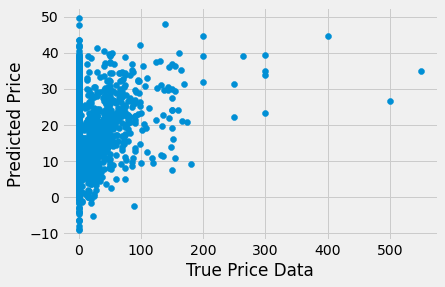

In [32]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**Similar issue to above, now there's a line of former NaN values at 0**<br>
Another issue to note, I am bulk assigning to all features. This might not make sense in all places. For example, this picks 0, or no, for dummy variables. 

## Recent Boardgames Only
In order to elimiate strange values for older games, let's narrow focus to the last 10 years. Older games may be out of print and collector items therefore providing extreme outlier price points. 

In [33]:
recent = df[df['yearpublished_dt'] > '2010']
recent.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5881 entries, 0 to 10017
Data columns (total 113 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   link                 5881 non-null   object        
 1   rank                 5881 non-null   float64       
 2   desc                 5881 non-null   object        
 3   geek                 5881 non-null   float64       
 4   rating               5881 non-null   float64       
 5   num_voters           5881 non-null   int64         
 6   price                5881 non-null   object        
 7   average              5881 non-null   object        
 8   avgweight            5881 non-null   float64       
 9   baverage             5881 non-null   float64       
 10  maxplayers           5881 non-null   float64       
 11  maxplaytime          5881 non-null   float64       
 12  minage               5881 non-null   float64       
 13  minplayers           5881 non-n

**Unfortunately only about $1/4$ to $1/3$ of data has price data, regardless of date limited**

**Eliminate high prices**<br>
Many games can be very expensive

In [34]:
no_highprice = recent.copy()
no_highprice['price_mkt'] = np.where((recent.price_mkt > 200),200,recent.price_mkt)
no_highprice.price_mkt.max()

200.0

In [35]:
no_highprice.price_mkt.mean(), df.price_mkt.mean()

(46.34920919656386, 50.67651560624258)

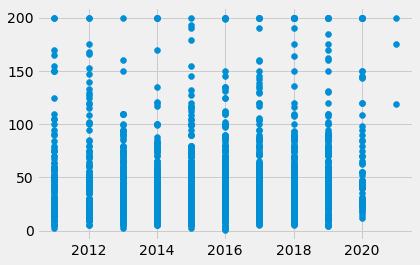

In [36]:
plt.scatter(no_highprice.yearpublished_dt, no_highprice.price_mkt)

#### Imputing (KNN) seems to offer a solution

Let's try imputing with KNN

In [37]:
from sklearn.impute import KNNImputer

In [38]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_vals = imputer.fit_transform(X)

In [39]:
lr = LinearRegression()

X = no_highprice[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_vals = imputer.fit_transform(X)

In [40]:
y = no_highprice[['price_mkt']]
imp_y = imputer.fit_transform(y)
lr.fit(imp_vals, imp_y)
lr.score(imp_vals, imp_y), lr.coef_

(0.10244028349956324,
 array([[ 5.76524111, -0.06895041, -0.95758264, -2.17327245,  4.83077462,
          3.00785064,  3.98702852]]))

In [41]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

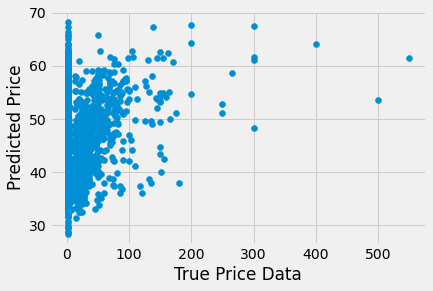

In [42]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**Doubled our R2, and the scatter looks more linear** However, is this a fair approach? It looks very similar to the mean approach taken above. However the R2 is still higher.
### Let's try MICE

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
lr = LinearRegression()

X = no_highprice[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]
imputer = IterativeImputer()
imp_vals = imputer.fit_transform(X)

In [45]:
y = no_highprice[['price_mkt']]
imp_y = imputer.fit_transform(y)
lr.fit(imp_vals, imp_y)
lr.score(imp_vals, imp_y), lr.coef_

(0.1027994886188528,
 array([[ 5.72190751, -0.0665867 , -0.96421277, -2.18550831,  4.81844996,
          3.24143939,  3.83690723]]))

In [46]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

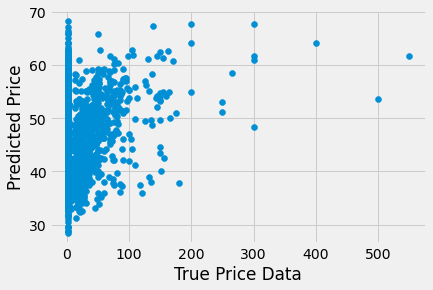

In [47]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

The iterative imputer shows nearly identical results. Similarly, the R2 is doubled, but the imputed results are very similar.  

In [48]:
lr.predict([[3, 1, 0, 0, 1, 3.5, 4]])

array([[32.30397943]])

In [49]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train, lr_model_ridge.coef_)), lr_model_ridge.score(X_test, y_test)

([('avgweight',
   array([ 8.18169705, -3.1088178 ,  2.82359301, -6.11538735,  8.6310656 ,
           0.23792132,  4.42134379]))],
 0.06201661220931798)

## Let's Build some models around a different Output.
### Let's anticipate how a new game might rank on BGG.

In [263]:
sub_df = df[['rank','avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub','quality_pub', 'quality_des']]

In [51]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         10018 non-null  float64
 1   avgweight    10018 non-null  float64
 2   strategy     10018 non-null  int64  
 3   war          10018 non-null  int64  
 4   family       10018 non-null  int64  
 5   abstract     10018 non-null  int64  
 6   thematic     10018 non-null  int64  
 7   geek_des     9906 non-null   float64
 8   geek_pub     10008 non-null  float64
 9   quality_pub  10018 non-null  int64  
 10  quality_des  10018 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.2 MB


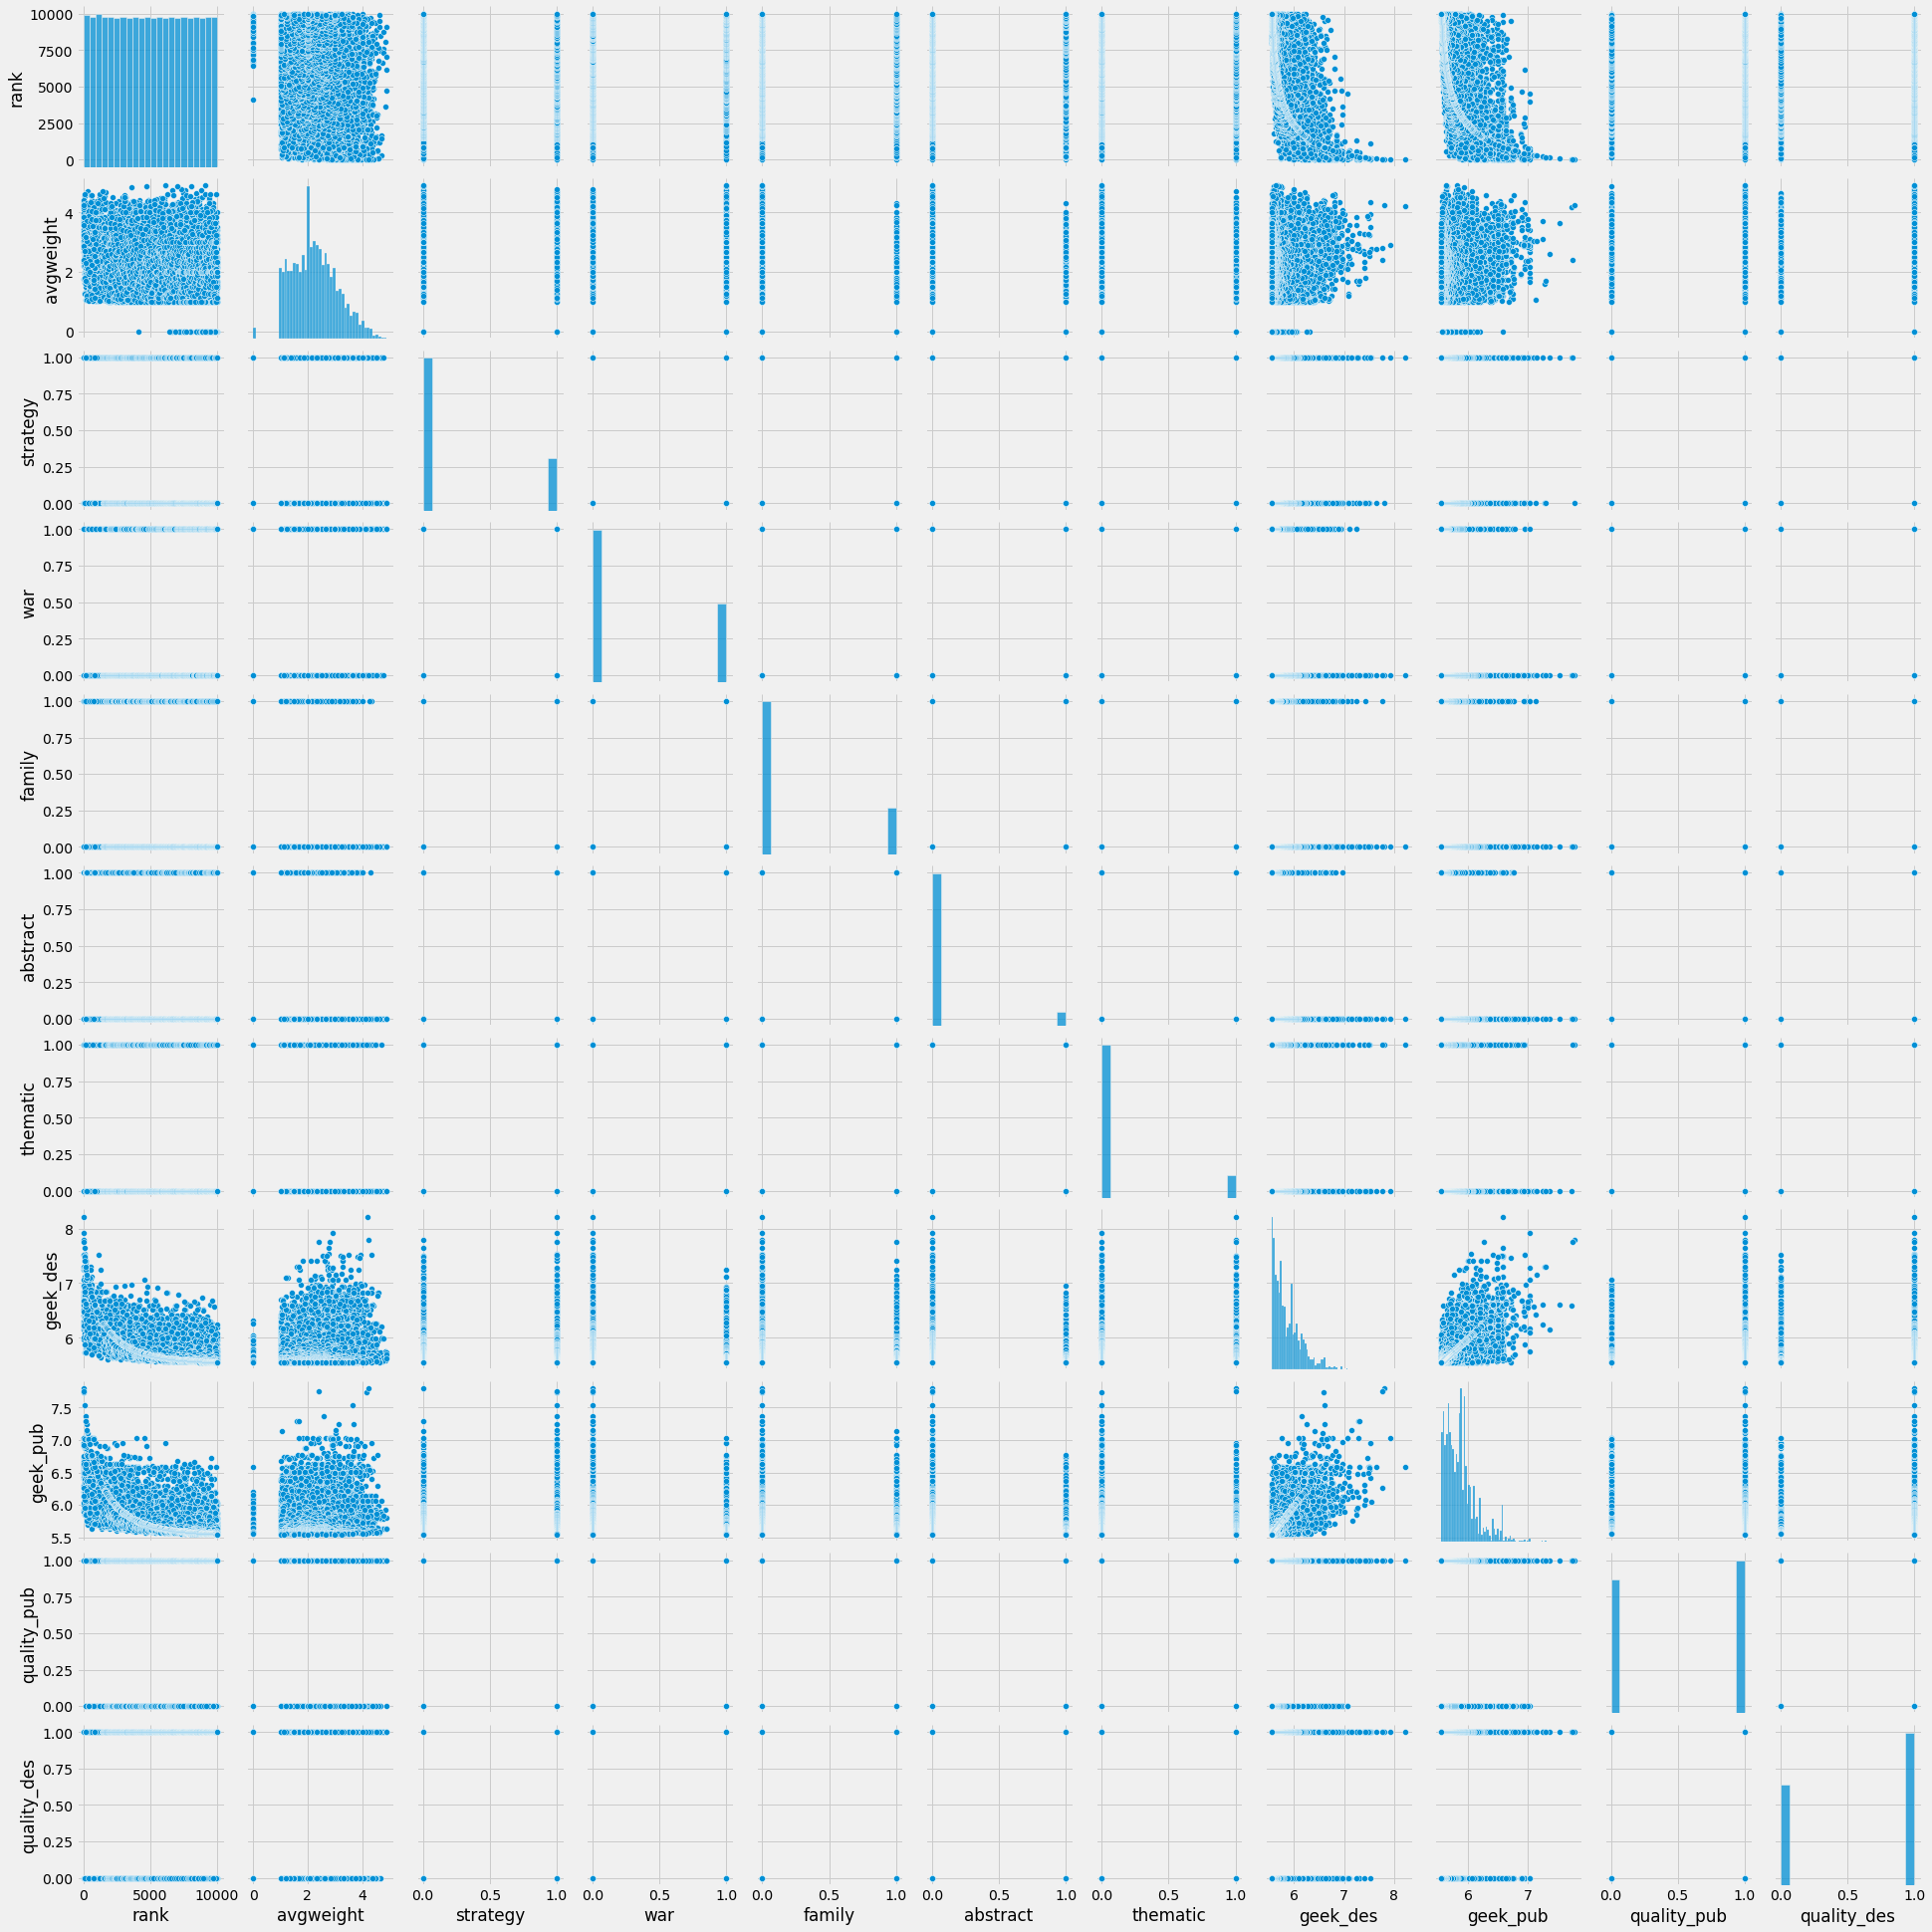

In [52]:
sns.pairplot(sub_df)

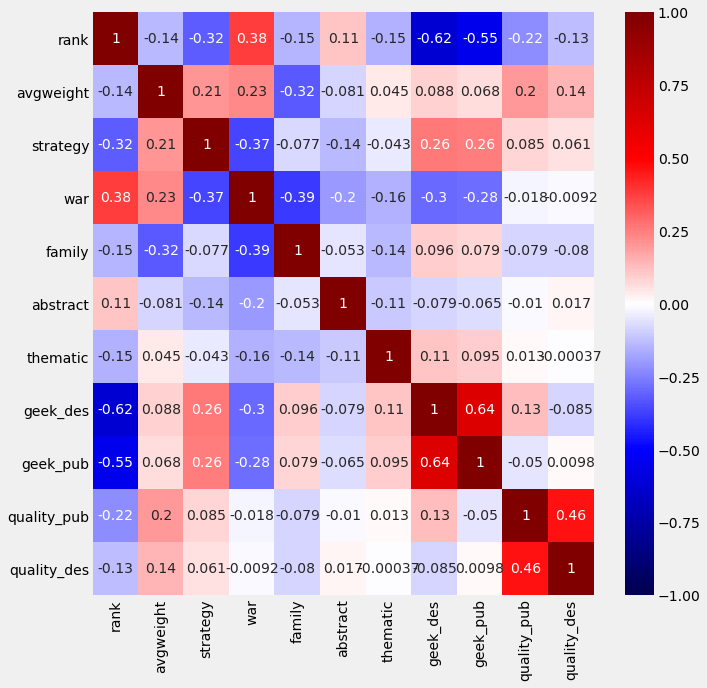

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(sub_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1).figure.savefig('graphs/heatmap.png')

In [286]:
lr1 = LinearRegression()

X = df[['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]
imputer = IterativeImputer()
imp = imputer.fit_transform(X)
y = df[['rank']]
lr1.fit(imp, y)

lr1.score(imp, y), lr1.coef_, lr1.intercept_

(0.48846319821968587,
 array([[ -462.73990671,  -415.07723113,  1156.50111789,  -493.44561258,
           808.32127761,  -478.54513996, -3660.07304411, -2326.02978537]]),
 array([41010.56063759]))

**Reasons for features**: I assume that we can know many things about a new game, but we cannot know others. For example, the designer, the publisher, their qualities and ratings can all be known, but the individual new game's rating is not yet known (until after release and testing). I assume a publisher wants to know where a game might rank in BGG ranking system. Unlike the pure user voted 'Rating', 'Geek' is BGG own rating system. I use geek scores for designer and publisher. I also consider the year a game was published, as quality games may take time to rise through BGG ranking system. 

In [287]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [288]:
X_train.shape, y_train.shape

((6010, 8), (6010, 1))

In [289]:
X_test.shape, y_test.shape

((2004, 8), (2004, 1))

In [290]:
predicts = lr1.predict(X_test)

In [291]:
line = 42037.36112083 + (-332.01327709 * df.avgweight) + (-405.39363017*df.strategy) + (1046.82136161*df.war)+\
(-575.80601058 * df.family) + (796.74958152*df.abstract) + (-515.14877684*df.thematic) + (-3505.69373295*df.geek_des)+\
(-2577.33549376 * df.geek_pub)

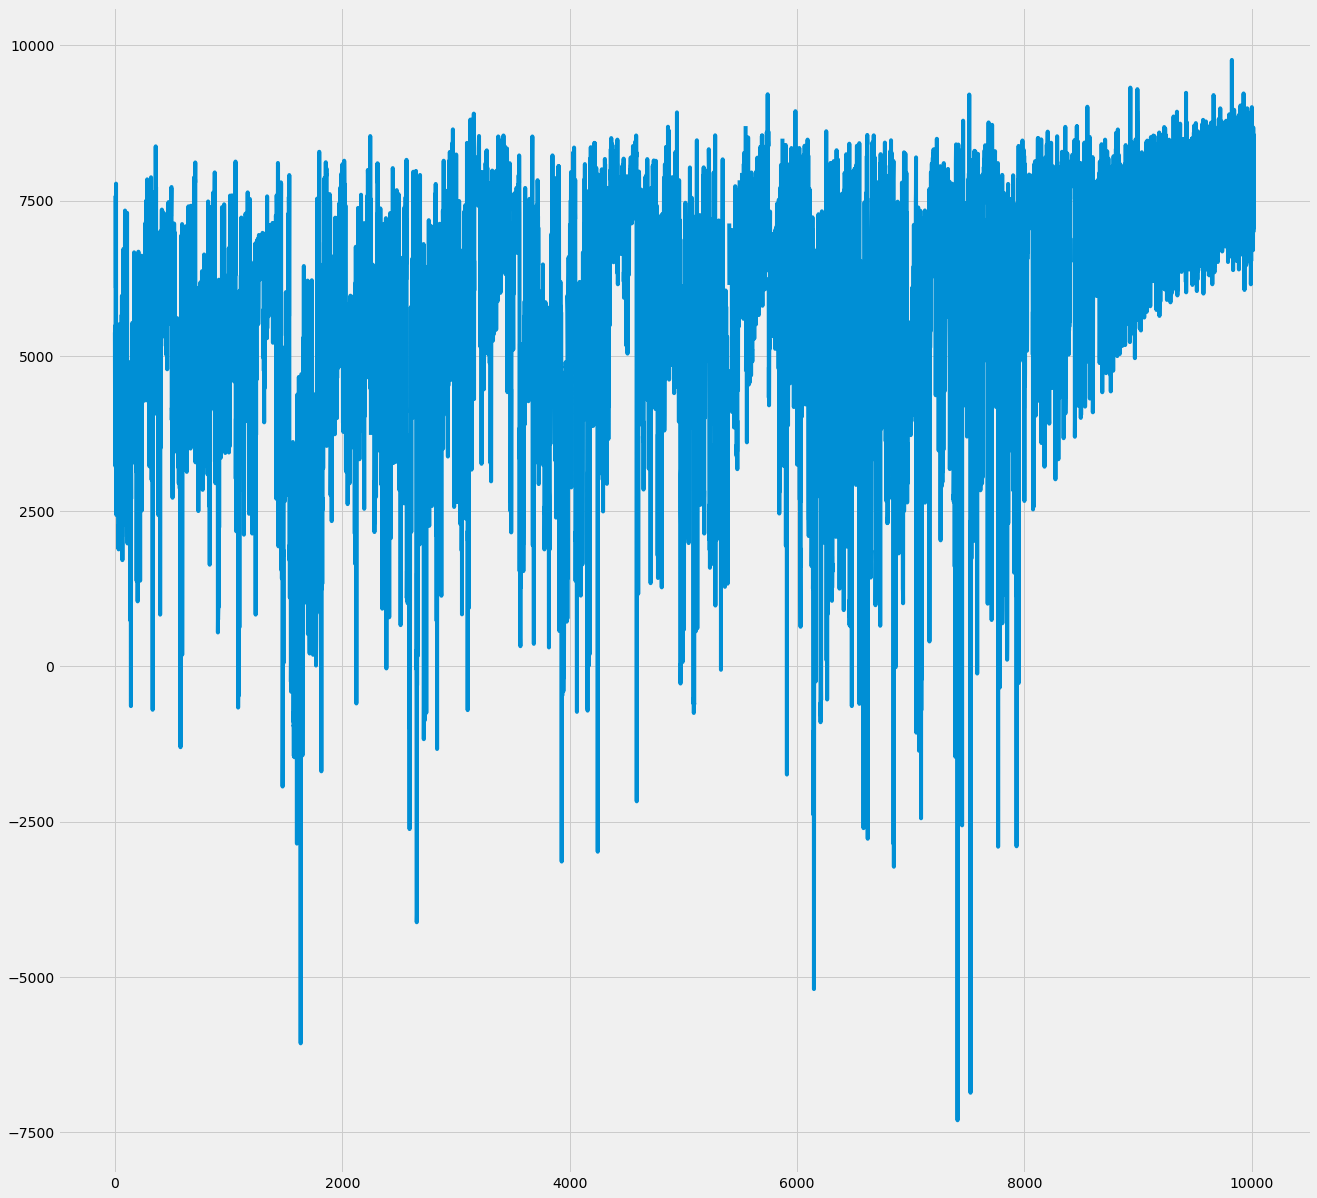

In [292]:
plt.figure(figsize=(20,20))
plt.plot(line)

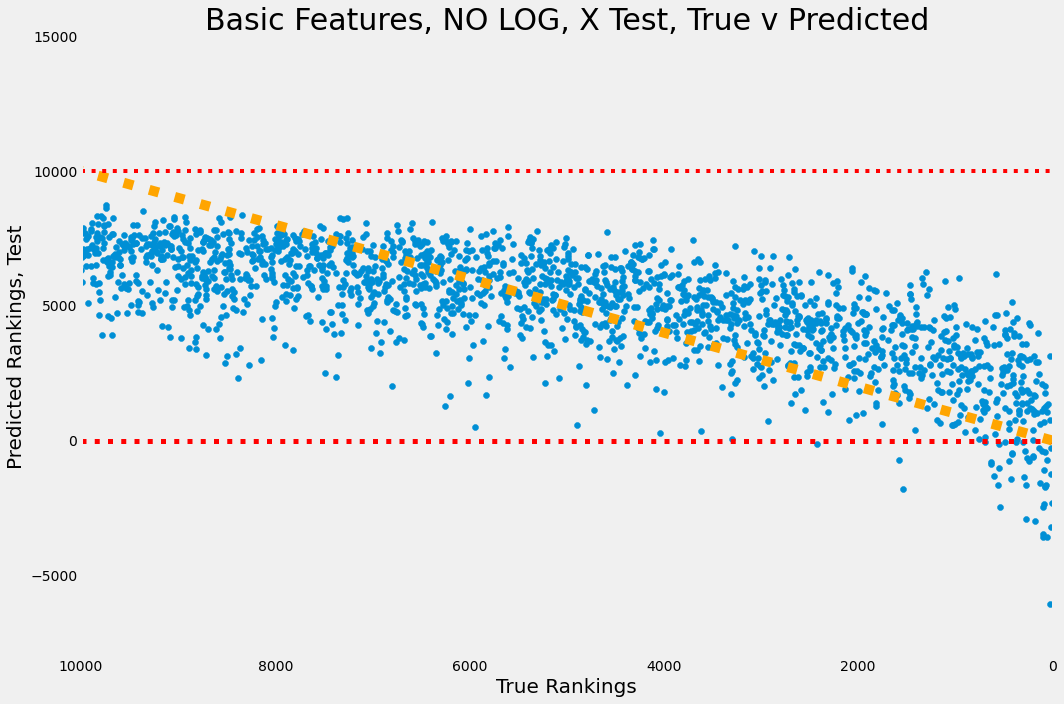

In [298]:
fig, ax = plt.subplots()
plt.xlabel('True Rankings', size = 20)
plt.ylabel('Predicted Rankings, Test', size = 20)
plt.title("Basic Features, NO LOG, X Test, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
ax.set_ylim(-8000,15000)
plt.plot(line_x,line_y, c = 'orange', linestyle=':', linewidth = 10)
ax.axhline(10000, c='r', linestyle = ':')
plt.grid()
plt.tight_layout()
plt.scatter(y_test, predicts).figure.savefig("graphs/NOLOG_test.png")

In [62]:
predict_train = lr1.predict(X_train)

(10000.0, 0.0)

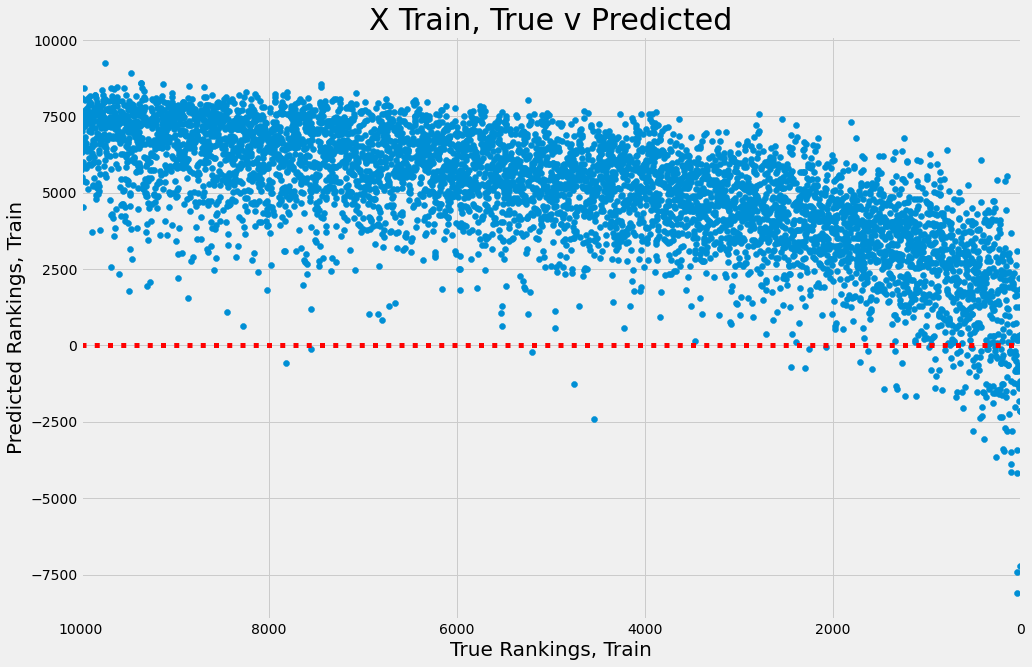

In [63]:
fig, ax = plt.subplots()
plt.scatter(y_train, predict_train)
plt.xlabel('True Rankings, Train', size = 20)
plt.ylabel('Predicted Rankings, Train', size =20)
plt.title("X Train, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

### R2 ratio is .934 suggesting decent model with slight underfit

In [64]:
ratio_r2 = lr1.score(X_train, y_train)/lr1.score(X_test, y_test)
ratio_r2

0.9342951123259348

### Residual Plots

In [65]:
resid_test = abs(predicts - y_test)

(10000.0, 0.0)

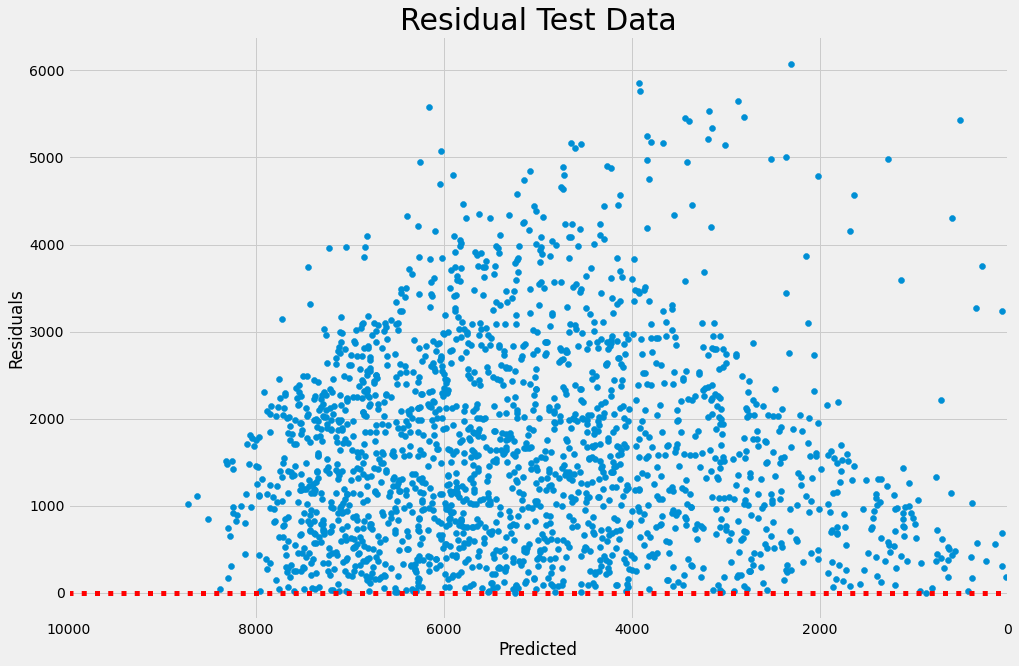

In [66]:
fig, ax = plt.subplots()
plt.scatter(predicts, resid_test)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Test Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [67]:
resid_train = abs(y_train - predict_train)

(10000.0, 0.0)

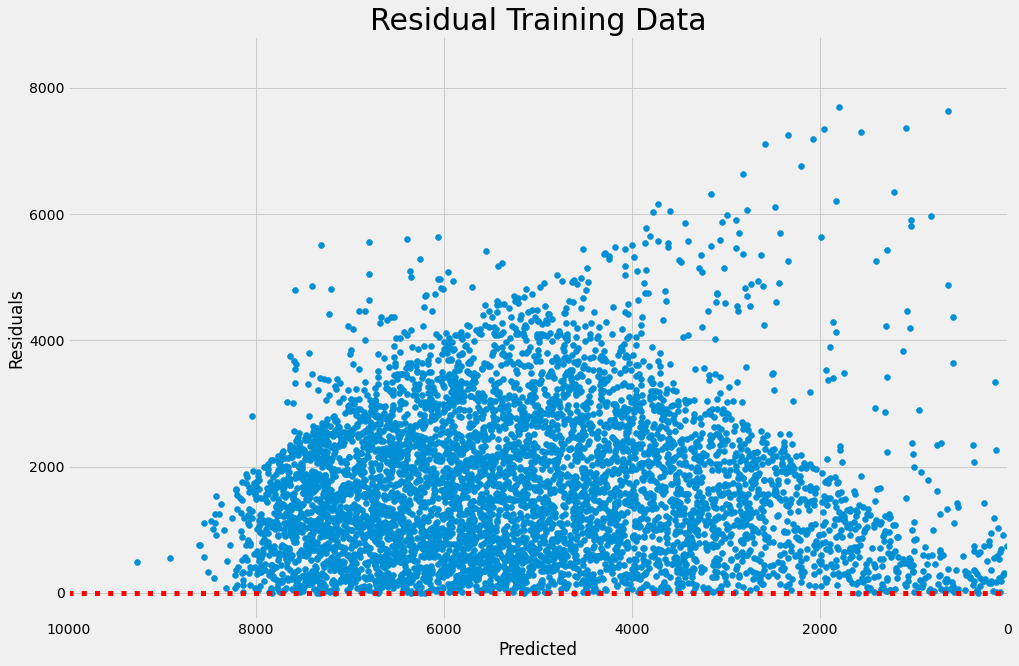

In [68]:
fig, ax = plt.subplots()
plt.scatter(predict_train, resid_train)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Training Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [69]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr1, imp, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

array([ 0.32844475,  0.37284326,  0.4120962 ,  0.48155988,  0.47086444,
        0.41229998,  0.49801203,  0.39468427,  0.38777025, -0.07753281])

In [70]:
import statsmodels.api as sm

In [71]:
Xc = sm.add_constant(imp)
model = sm.OLS(y, Xc) 
results = model.fit()

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:49:54   Log-Likelihood:                -90689.
No. Observations:               10018   AIC:                         1.814e+05
Df Residuals:                   10009   BIC:                         1.815e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.101e+04    527.337     77.769      0.000       4e+04     4.2e+04
x1          -462.7399     28.090    -16.473      0.000    -517.802    -407.678
x2          -415.0772     59.064     -7.028      0.000    -530.854    -299.301
x3          1156.5011     62.435     18.523      0.000    1034.117    1278.885
x4          -493.4456     59.704     -8.265      0.000    -610.478    -376.414
x5           808.3213     82.759      9.767      0.000     646.097     970.545
x6          -478.5451     66.782     -7.166      0.000    -609.452    -347.638
x7         -3660.0730     91.338    -40.072      0.000   -3839.114   -3481.032
x8         -2326.0298    103.402    -22.495      0.000   -2528.718   -2123.341
==============================================================================
Omnibus:                      152.831   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.050
Skew:                           0.293   Prob(JB):                     1.30e-34
Kurtosis:                       2.826   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predictions

**Verifying the intercept**

In [ ]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'quality_pub', 'quality_des'
lr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [76]:
df[df['rank']==5003].loc[:,['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub','quality_pub']]

avgweight  strategy  war  family  abstract  thematic  geek_des  \
4037     1.0833         0    0       0         0         0     5.677   

      geek_pub  quality_pub  
4037  5.721429            0

In [77]:
df.geek_des.mean(), df.geek_pub.mean()

(5.871946194225731, 5.869943145483614)

In [78]:
df.avgweight.median(), df.strategy.median(), df.war.median(), df.family.median(), df.abstract.median(), df.thematic.median(), df.geek_des.mean(), df.geek_pub.mean(), df.quality_pub.median(), df.quality_des.median()

(2.2, 0.0, 0.0, 0.0, 0.0, 0.0, 5.871946194225731, 5.869943145483614, 1.0, 1.0)

In [ ]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'quality_pub', 'quality_des'
lr.predict([[2.2, 0.0, 0.0, 0.0, 0.0, 0.0, 5.871946194225721, 5.869943145483614, 1.0, 1.0]])

In [80]:
df.avgweight.max(), df.strategy.max(), df.war.max(), df.family.max(), df.abstract.max(), df.thematic.max(), df.geek_des.max(), df.geek_pub.max(), df.quality_pub.max(), df.quality_des.max()

(4.913, 1, 1, 1, 1, 1, 8.221, 7.796, 1, 1)

In [81]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'quality_pub', 'quality_des'
lr.predict([[2.913, 0, 1, 0, 0, 0, 6.8699999, 6.9963, 0, 0]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 10)

## Lasso and Ridge
Checking to see if model can be simplified. 

In [82]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [88]:
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [89]:
X_tr = std.transform(X_train)

In [90]:
X_te = std.transform(X_test)

In [91]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_tr, y_train)

lr_model_ridge.coef_, lr_model_ridge.score(imp,y)

(array([[ -358.9882734 ,  -211.10680871,   536.06790378,  -224.88283847,
           212.98918247,  -208.93414323, -1091.45195009,  -570.74212844]]),
 -12.903418093913169)

In [92]:
(lr_model_ridge.score(X_tr, y_train)/lr_model_ridge.score(X_te, y_test))/ratio_r2

1.0041571000673524

In [93]:
reg_lr_model_ridge = RidgeCV()
reg_lr_model_ridge.fit(X_tr, y_train)

reg_lr_model_ridge.coef_, reg_lr_model_ridge.score(X_tr,y_train)

(array([[ -358.9882734 ,  -211.10680871,   536.06790378,  -224.88283847,
           212.98918247,  -208.93414323, -1091.45195009,  -570.74212844]]),
 0.47929146313383375)

In [94]:
lr_model_lasso = LassoCV()
lr_model_lasso.fit(imp, y)
lr_model_lasso.coef_, lr_model_lasso.score(imp, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(array([ -461.83022708,  -413.62794751,  1156.27326285,  -489.8417338 ,
          803.03402709,  -474.18162748, -3659.2490412 , -2321.08962105]),
 0.48846180309813003)

In [95]:
(lr_model_lasso.score(X_train, y_train)/lr_model_lasso.score(X_test, y_test))/ratio_r2

1.00000840682019

In [96]:
reg_lr_model_lasso = LassoCV()
reg_lr_model_lasso.fit(X_tr, y_train)
reg_lr_model_lasso.coef_, reg_lr_model_lasso.score(X_tr, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(array([ -357.43768226,  -209.62389057,   536.15749284,  -222.55417177,
          212.13678992,  -207.17233726, -1093.24815886,  -569.62552609]),
 0.4792898048023563)

In [97]:
(lr_model_lasso.score(X_train, y_train)/lr_model_lasso.score(X_test, y_test))/ratio_r2

1.00000840682019

**No great improvement with L and R** No improvement with regularization

In [98]:
ridge_predict = lr_model_ridge.predict(X_te)

(10000.0, 0.0)

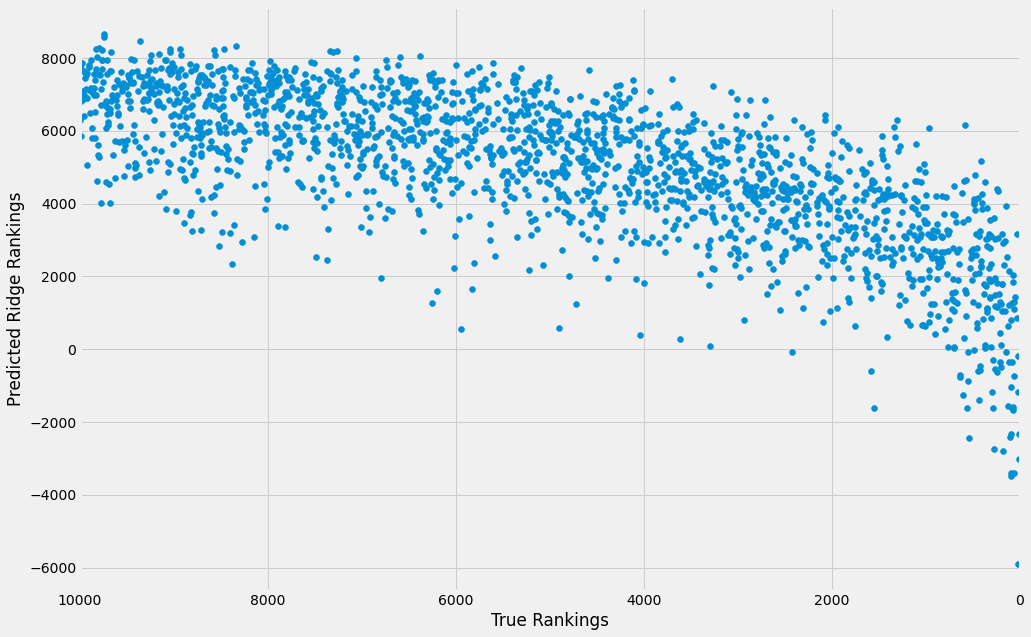

In [99]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(15,10)
plt.scatter(y_test, ridge_predict)
plt.xlabel('True Rankings')
plt.ylabel('Predicted Ridge Rankings')
ax.set_xlim(10000,0)

### Let's try the Log of Rank

In [100]:
lr_logR = LinearRegression()

X = df[['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]
imputer = IterativeImputer()
imp = imputer.fit_transform(X)
y = np.log(df[['rank']])
lr_logR.fit(imp, y)

lr_logR.score(imp, y), lr_logR.coef_, lr_logR.intercept_

(0.5565983768527971,
 array([[-0.17019828, -0.14697593,  0.24841662, -0.07131018,  0.14470967,
         -0.1159365 , -1.52161076, -0.92619104]]),
 array([22.93792194]))

In [101]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [102]:
predicts = lr_logR.predict(X_test)

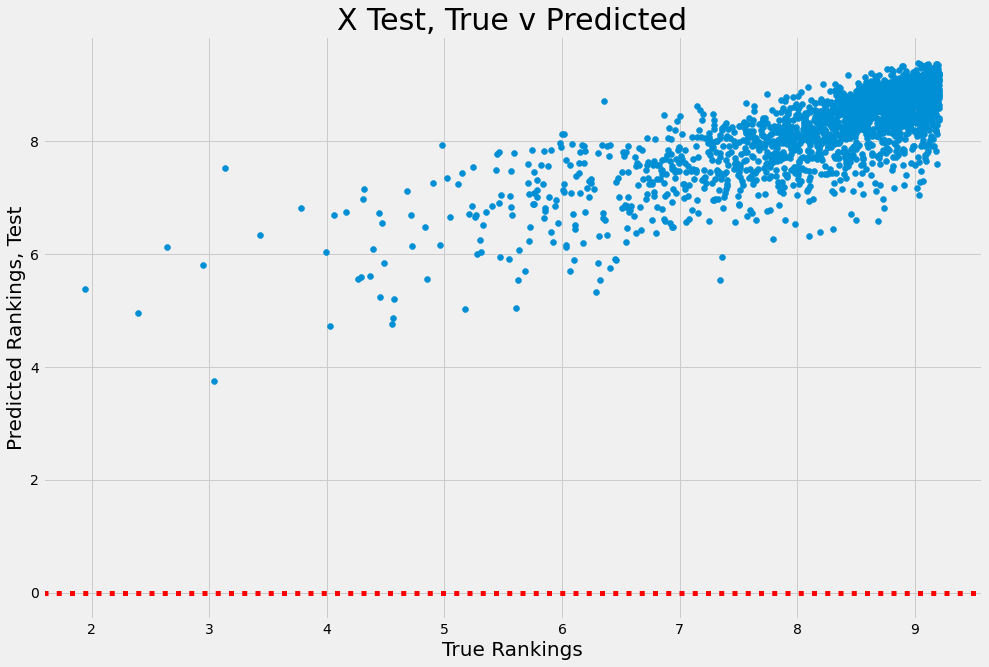

In [103]:
fig, ax = plt.subplots()
plt.scatter(y_test, predicts)
plt.xlabel('True Rankings', size = 20)
plt.ylabel('Predicted Rankings, Test', size = 20)
plt.title("X Test, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)

## Log of Geek_des and Geek_pub
The R2 increases and also reduces unlikely negative rank responses.

In [104]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 113 columns):
 #   Column               Dtype         
---  ------               -----         
 0   link                 object        
 1   rank                 float64       
 2   desc                 object        
 3   geek                 float64       
 4   rating               float64       
 5   num_voters           int64         
 6   price                object        
 7   average              object        
 8   avgweight            float64       
 9   baverage             float64       
 10  maxplayers           float64       
 11  maxplaytime          float64       
 12  minage               float64       
 13  minplayers           float64       
 14  minplaytime          float64       
 15  numcomments          float64       
 16  numfans              float64       
 17  numgeeklists         float64       
 18  numhasparts          float64       
 19  numowned             flo

In [278]:
sub_df = df[['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]

In [279]:
sub_df['log_geek_des'] = np.log(sub_df['geek_des'])
sub_df['log_geek_pub'] = np.log(sub_df['geek_pub'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


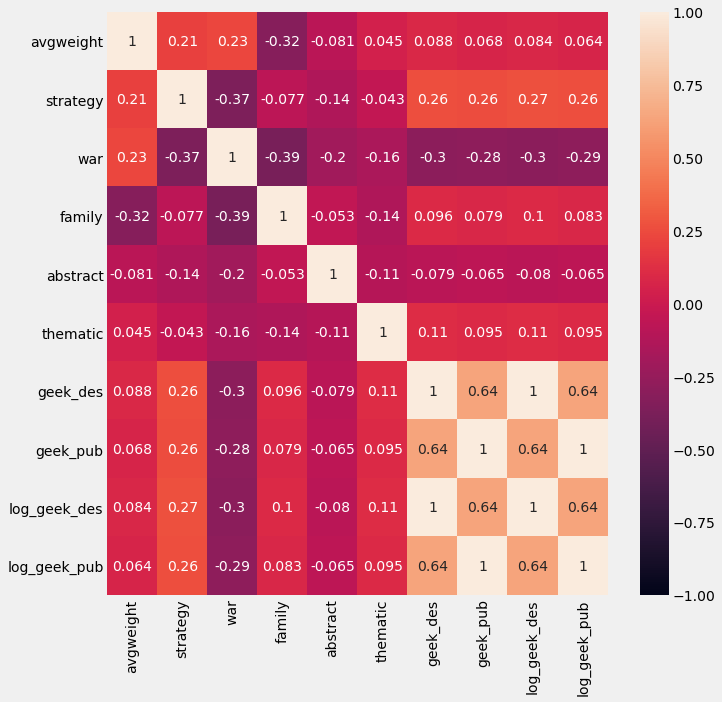

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(sub_df.corr(), annot=True, vmin=-1, vmax=1).figure.savefig('graphs/heatmap.png', bbox_inches = 'tight')

In [280]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   avgweight     10018 non-null  float64
 1   strategy      10018 non-null  int64  
 2   war           10018 non-null  int64  
 3   family        10018 non-null  int64  
 4   abstract      10018 non-null  int64  
 5   thematic      10018 non-null  int64  
 6   geek_des      9906 non-null   float64
 7   geek_pub      10008 non-null  float64
 8   log_geek_des  9906 non-null   float64
 9   log_geek_pub  10008 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.2 MB


In [319]:
X = sub_df
imputer = IterativeImputer()
imp = imputer.fit_transform(X)
y = df[['rank']]

In [320]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [321]:
lr_log = LinearRegression()

lr_log.fit(X_train, y_train)

lr_log.score(X_train, y_train), lr_log.coef_, lr_log.intercept_

(0.5282853336077042,
 array([[   -507.5048045 ,    -383.28630729,     983.62197334,
            -405.58932898,     671.86962538,    -593.5846215 ,
           35891.55525815,   27241.1655436 , -241263.23821241,
         -178026.95898147]]),
 array([377059.4222557]))

In [326]:
lr_log.predict([[3, 1,0,1,0,1,7,7,np.log(7), np.log(7)]])

array([[182.4430777]])

In [284]:
predicts = lr_log.predict(X_test)

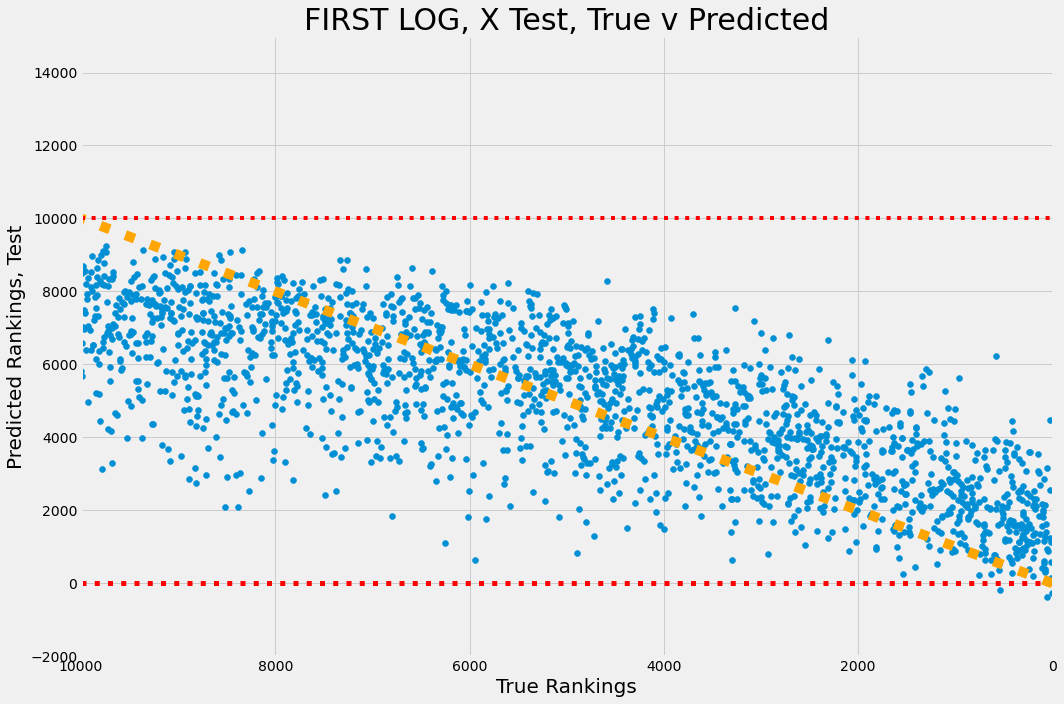

In [285]:
fig, ax = plt.subplots()
plt.xlabel('True Rankings', size = 20)
plt.ylabel('Predicted Rankings, Test', size = 20)
plt.title("FIRST LOG, X Test, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
plt.grid(axis = 'both')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
ax.set_xlim(10000,0)
ax.set_ylim(-2000,15000)
plt.plot(line_x,line_y, c = 'orange', linestyle=':', linewidth = 10)
ax.axhline(10000, c='r', linestyle = ':')
plt.grid()
plt.tight_layout()
plt.scatter(y_test, predicts).figure.savefig("graphs/FirstLog_test.png")

In [114]:
lr_log.score(X_test, y_test)

0.5627529382771704

In [115]:
predict_train = lr_log.predict(X_train)

(10000.0, 0.0)

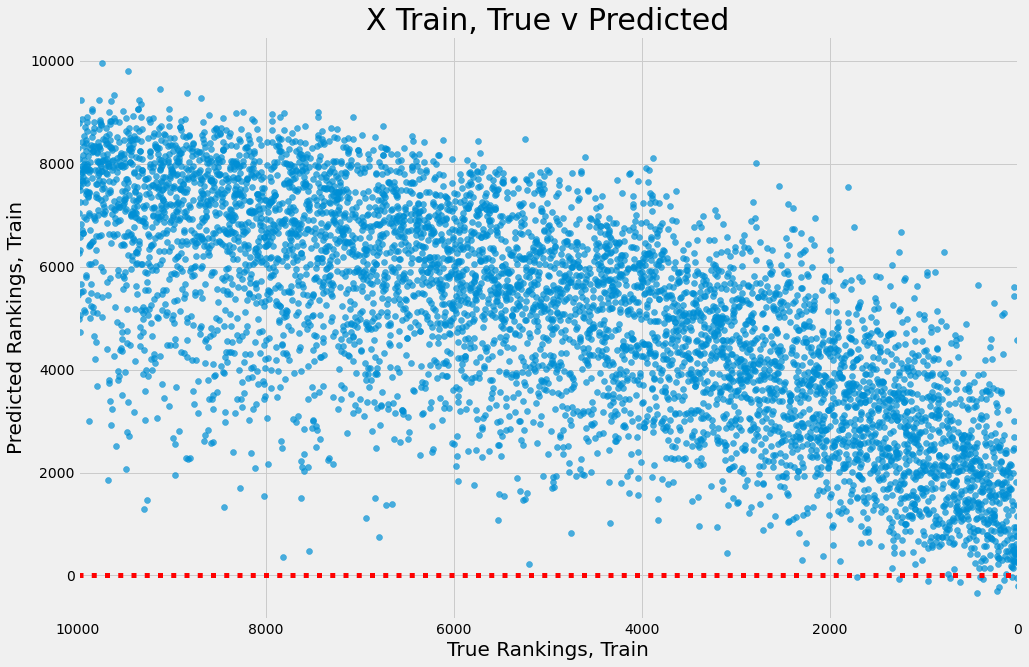

In [116]:
fig, ax = plt.subplots()
plt.scatter(y_train, predict_train, alpha =.7)
plt.xlabel('True Rankings, Train', size = 20)
plt.ylabel('Predicted Rankings, Train', size =20)
plt.title("X Train, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [117]:
lr_log.score(X_train, y_train)

0.5282853336077042

### R2 ratio is ~.94 suggesting decent model with slight underfit

In [119]:
ratio_r2 = lr_log.score(X_train, y_train)/lr_log.score(X_test, y_test)
ratio_r2

0.9387517997240736

### Residual Plots of Log Fit

In [120]:
resid_test = abs(predicts - y_test)

(10000.0, 0.0)

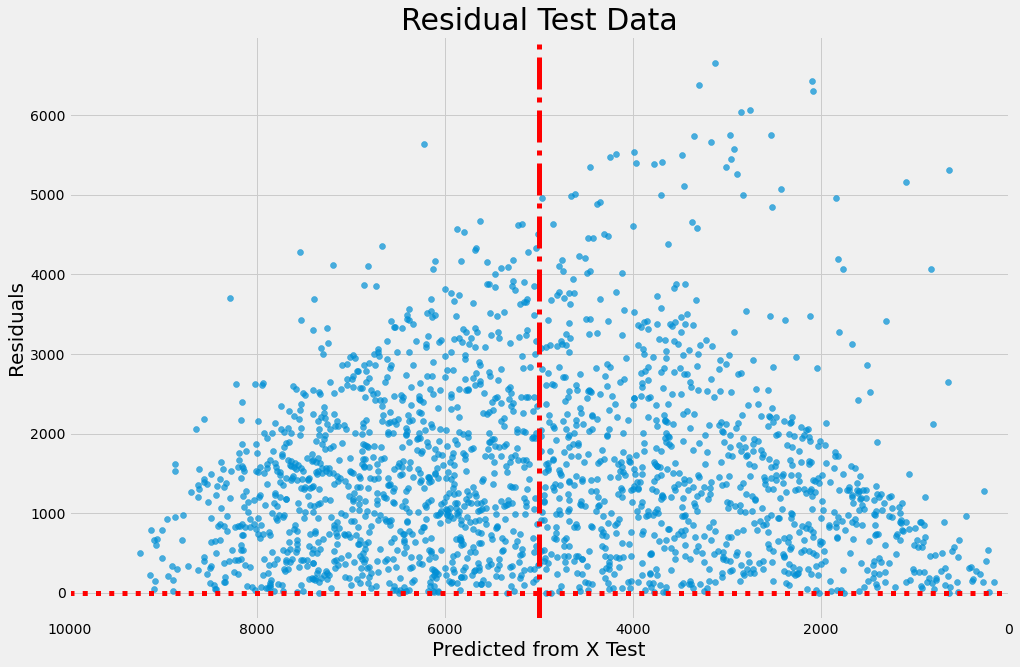

In [121]:
fig, ax = plt.subplots()
plt.scatter(predicts, resid_test, alpha=.7)
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X Test', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Test Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [122]:
resid_train = abs(predict_train-y_train)

(10000.0, 0.0)

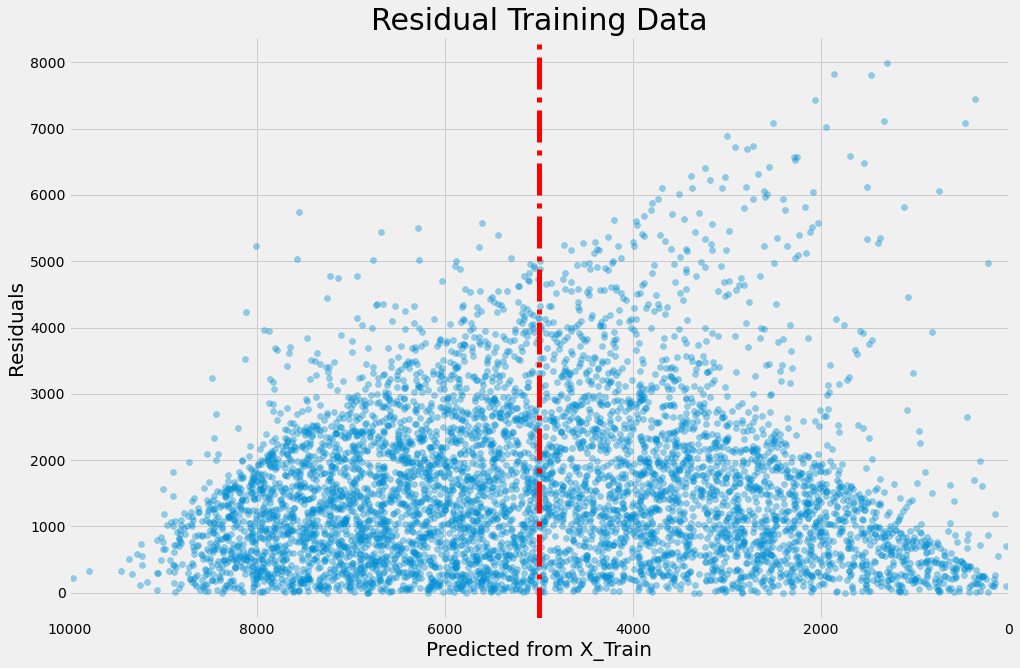

In [123]:
fig, ax = plt.subplots()
plt.scatter(predict_train, resid_train, alpha=.4)
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X_Train', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Training Data', size = 30)
#ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [124]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_log, imp, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

array([0.37485319, 0.46053196, 0.45537249, 0.53722263, 0.49546566,
       0.4527683 , 0.54411993, 0.43264718, 0.45429976, 0.3627132 ])

In [125]:
import statsmodels.api as sm

In [126]:
Xcons = sm.add_constant(X_train)
model = sm.OLS(y_train, Xcons) 
results = model.fit()

In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     671.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:54:20   Log-Likelihood:                -54158.
No. Observations:                6010   AIC:                         1.083e+05
Df Residuals:                    5999   BIC:                         1.084e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.771e+05   1.42e+04     26.590      0.000    3.49e+05    4.05e+05
x1          -507.5048     34.493    -14.713      0.000    -575.123    -439.887
x2          -383.2863     73.495     -5.215      0.000    -527.364    -239.209
x3           983.6220     77.190     12.743      0.000     832.303    1134.941
x4          -405.5893     74.299     -5.459      0.000    -551.242    -259.937
x5           671.8696    103.032      6.521      0.000     469.889     873.850
x6          -593.5846     81.335     -7.298      0.000    -753.031    -434.138
x7          3.589e+04   2374.536     15.115      0.000    3.12e+04    4.05e+04
x8          2.724e+04   2970.260      9.171      0.000    2.14e+04    3.31e+04
x9         -2.413e+05   1.45e+04    -16.639      0.000    -2.7e+05   -2.13e+05
x10         -1.78e+05    1.8e+04     -9.871      0.000   -2.13e+05   -1.43e+05
==============================================================================
Omnibus:                      257.997   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.449
Skew:                           0.510   Prob(JB):                     1.15e-64
Kurtosis:                       3.367   Cond. No.                     7.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictions from Improved Log Model

In [405]:
rank1 = 1600

In [406]:
df[df['rank']==rank1].loc[:,['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]

avgweight  strategy  war  family  abstract  thematic  geek_des  geek_pub
8075     2.1837         0    0       0         1         0  5.810333      6.22

In [407]:
game_wgt = 2.1837
des_score = 5.81033
pub_score = 6.22
log_des = np.log(des_score)
log_pub = np.log(pub_score)

In [408]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'log_geek_des', 'log_geek_pub'
lr_log.predict([[game_wgt, 0, 0, 0, 1, 0, des_score, pub_score,log_des,log_pub]])

array([[4676.7559142]])

In [409]:
np.e**(lr_logR.predict([[game_wgt, 0, 0, 0, 1, 0, des_score, pub_score]]))

array([[3324.25447966]])

**Try a number above 4,000**

In [395]:
rank2 = 10000

In [396]:
df[df['rank']==rank2].loc[:,['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]

avgweight  strategy  war  family  abstract  thematic  geek_des  geek_pub
6860        2.0         0    0       0         1         0  6.026333     5.633

In [400]:
game_wgt = 2
des_score = 6.026333
pub_score = 5.633
log_des = np.log(des_score)
log_pub = np.log(pub_score)

In [401]:
poly_predict = p.fit_transform([[game_wgt, 0, 0, 0, 1, 0, des_score, pub_score,log_des,log_pub]])

In [398]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'log_geek_des', 'log_geek_pub'
(lr_log.predict([[game_wgt, 1, 0, 0, 0, 1, des_score, pub_score,log_des,log_pub]]))

array([[-194.37757209]])

In [402]:
np.e**lr_poly.predict(poly_predict)

array([[5589.00926669]])

In [137]:
rank2-(np.e**(lr_logR.predict([[game_wgt, 0, 1, 0, 0, 0, des_score, pub_score]])))

array([[144.17407079]])

**Verifying the intercept**

In [138]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'log_geek_des', 'log_geek_pub'
lr_log.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([[377059.4222557]])

In [139]:
np.e**(lr_logR.predict([[0, 0, 0, 0, 0, 0, 0, 0]]))

array([[9.1582591e+09]])

In [140]:
sub_df[sub_df.geek_des == sub_df.geek_des.max()]

avgweight  strategy  war  family  abstract  thematic  geek_des  \
1634     4.2109         1    0       0         0         1     8.221   

      geek_pub  log_geek_des  log_geek_pub  
1634   6.58388      2.106692      1.884624

In [141]:
df.geek_des.mean(), df.geek_pub.mean()

(5.871946194225731, 5.869943145483614)

In [142]:
df.avgweight.median(), df.strategy.median(), df.war.median(), df.family.median(), df.abstract.median(), df.thematic.median(), df.geek_des.mean(), df.geek_pub.mean(), df.quality_pub.median(), df.quality_des.median()

(2.2, 0.0, 0.0, 0.0, 0.0, 0.0, 5.871946194225731, 5.869943145483614, 1.0, 1.0)

In [144]:
df.avgweight.max(), df.strategy.max(), df.war.max(), df.family.max(), df.abstract.max(), df.thematic.max(), df.geek_des.max(), df.geek_pub.max(), df.quality_pub.max(), df.quality_des.max()

(4.913, 1, 1, 1, 1, 1, 8.221, 7.796, 1, 1)

In [145]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'quality_pub', 'quality_des'
lr.predict([[2.913, 0, 1, 0, 0, 0, 6.8699999, 6.9963, 0, 0]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 10)

### Polyfits?

In [146]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X_train)
X_poly_test = p.fit_transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)
lr_poly.score(X_poly, y_train), lr_poly.coef_, lr_poly.intercept_

(0.5903058727011814,
 array([[ 2.14530413e-04,  9.01448711e+04,  7.93293413e+03,
         -5.86483192e+04,  1.93216983e+04, -1.51453931e+05,
          1.11139542e+04,  4.13844286e+06,  4.86173780e+06,
         -2.65612483e+07, -3.22635170e+07,  1.50964376e+02,
         -2.31259711e+02, -7.69742754e+02,  4.04848010e+02,
         -3.43513627e+02, -2.72824544e+02,  1.31625378e+04,
          3.25298980e+03, -8.42871475e+04, -2.16328266e+04,
          7.93293416e+03,  2.70127810e+02,  3.70342770e+02,
          2.80291619e+02,  7.46645939e+02,  3.11255152e+03,
         -9.09594666e+02, -2.17110061e+04,  5.42878422e+03,
         -5.86483192e+04,  1.58502863e+03,  1.73988722e+02,
         -7.23586624e+02, -2.09340938e+04,  6.88786830e+02,
          1.37521774e+05, -2.40983205e+03,  1.93216983e+04,
         -1.13628987e+03, -4.12449209e+02,  6.75248434e+03,
         -1.05678693e+03, -4.53092979e+04,  4.01108710e+03,
         -1.51453931e+05, -5.29152549e+03, -2.81852031e+04,
         -3.4487402

In [355]:
predicts = lr_poly.predict(X_poly_test)

(10000.0, 0.0)

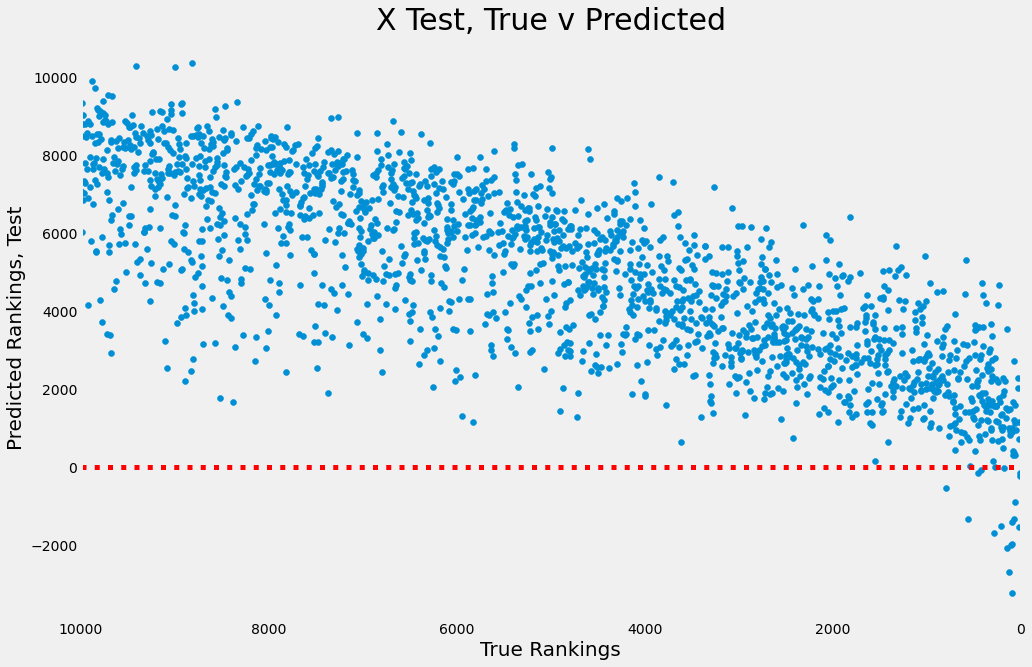

In [148]:
fig, ax = plt.subplots()
plt.scatter(y_test, predicts)
plt.xlabel('True Rankings', size = 20)
plt.ylabel('Predicted Rankings, Test', size = 20)
plt.title("X Test, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
plt.grid(axis = 'both')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [150]:
predict_train = lr_poly.predict(X_poly)

(10000.0, 0.0)

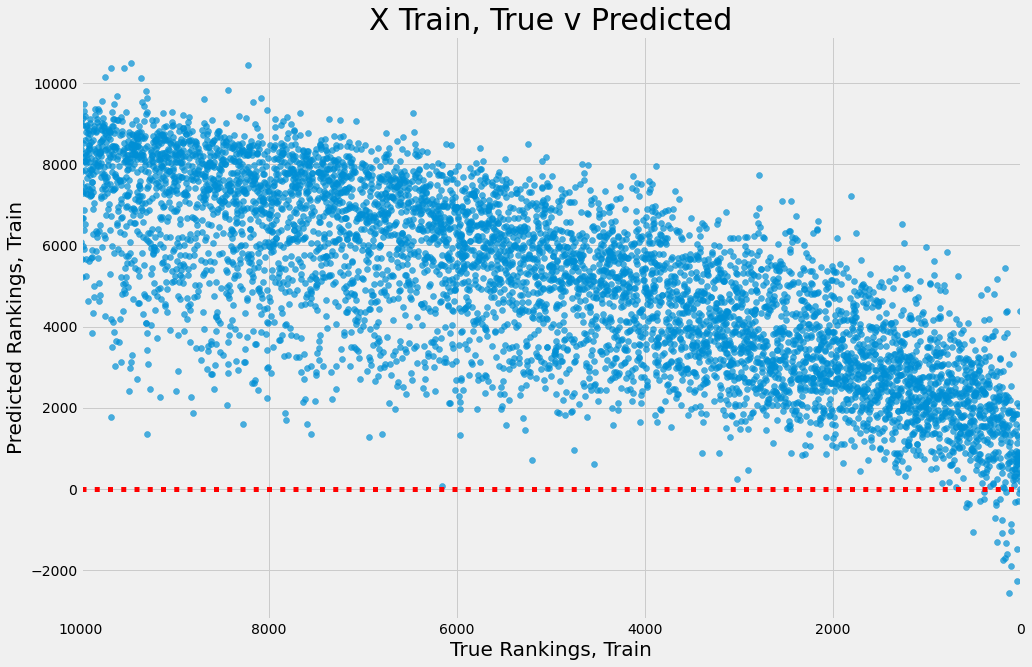

In [151]:
fig, ax = plt.subplots()
plt.scatter(y_train, predict_train, alpha =.7)
plt.xlabel('True Rankings, Train', size = 20)
plt.ylabel('Predicted Rankings, Train', size =20)
plt.title("X Train, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [152]:
lr_poly.score(X_poly, y_train)

0.5903058727011814

In [153]:
lr_poly.score(X_poly_test, y_test)

0.6158230084813708

### R2 ratio is .958 suggesting decent model with slight underfit

In [154]:
ratio_r2 = lr_poly.score(X_poly, y_train)/lr_poly.score(X_poly_test, y_test)
ratio_r2

0.9585641727756891

### Residual Plots of Poly Fit

In [155]:
resid_test = abs(predicts - y_test)

(10000.0, 0.0)

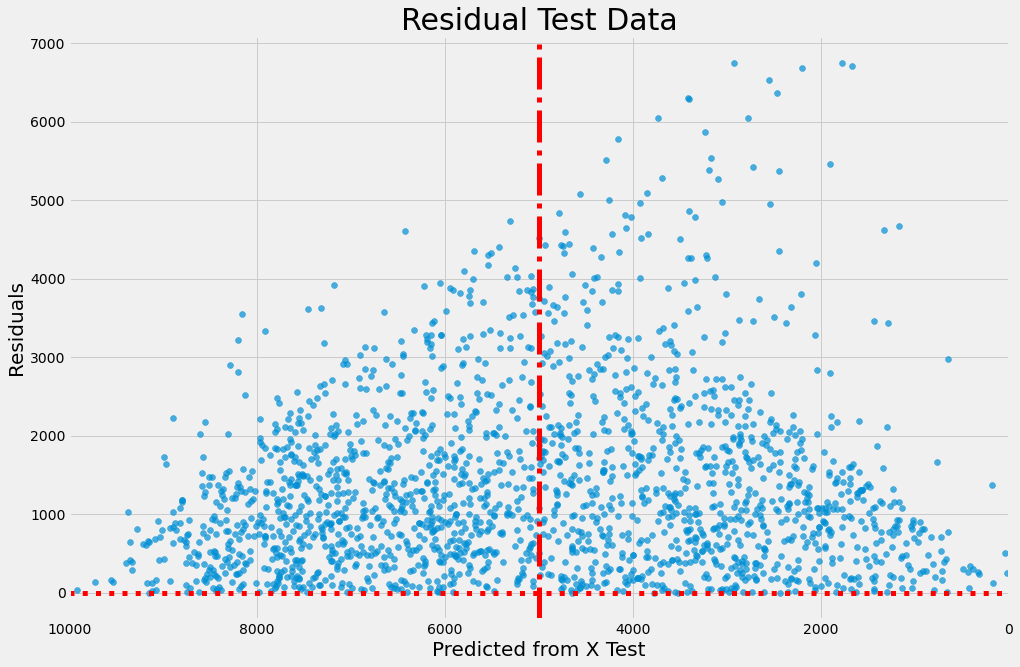

In [156]:
fig, ax = plt.subplots()
plt.scatter(predicts, resid_test, alpha=.7)
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X Test', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Test Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [157]:
resid_train = abs(predict_train-y_train)

(10000.0, 0.0)

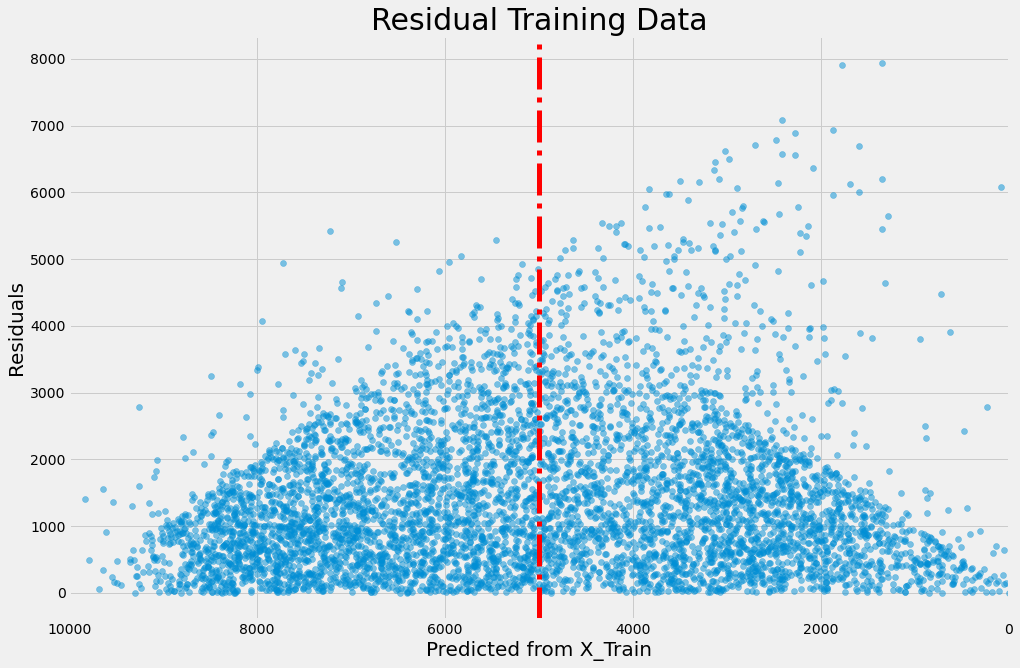

In [158]:
fig, ax = plt.subplots()
plt.scatter(predict_train, resid_train, alpha=.5)
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X_Train', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Training Data', size = 30)
#ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)

In [159]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_poly, imp, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

array([0.37485319, 0.46053196, 0.45537249, 0.53722263, 0.49546566,
       0.4527683 , 0.54411993, 0.43264718, 0.45429976, 0.3627132 ])

In [160]:
import statsmodels.api as sm

In [161]:
Xcons = sm.add_constant(X_poly)
model = sm.OLS(y_train, Xcons) 
results = model.fit()

In [162]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     142.9
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:55:35   Log-Likelihood:                -53734.
No. Observations:                6010   AIC:                         1.076e+05
Df Residuals:                    5949   BIC:                         1.080e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.609e+07   3.32e+06      7.857      0.000    1.96e+07    3.26e+07
x1          9.014e+04   1.73e+04      5.201      0.000    5.62e+04    1.24e+05
x2          7932.9342   1.78e+04      0.445      0.656    -2.7e+04    4.29e+04
x3         -5.865e+04   2.63e+04     -2.227      0.026    -1.1e+05   -7019.312
x4          1.932e+04   2.33e+04      0.829      0.407   -2.64e+04     6.5e+04
x5         -1.515e+05   3.95e+04     -3.837      0.000   -2.29e+05   -7.41e+04
x6          1.111e+04   2.23e+04      0.498      0.618   -3.26e+04    5.49e+04
x7          4.138e+06   8.69e+05      4.760      0.000    2.43e+06    5.84e+06
x8          4.862e+06   1.11e+06      4.395      0.000    2.69e+06    7.03e+06
x9         -2.656e+07   5.51e+06     -4.822      0.000   -3.74e+07   -1.58e+07
x10        -3.226e+07   6.74e+06     -4.785      0.000   -4.55e+07    -1.9e+07
x11          150.9644     30.412      4.964      0.000      91.346     210.582
x12         -231.2597    105.455     -2.193      0.028    -437.990     -24.529
x13         -769.7428     97.581     -7.888      0.000    -961.036    -578.449
x14          404.8480    121.897      3.321      0.001     165.886     643.810
x15         -343.5136    149.776     -2.294      0.022    -637.128     -49.899
x16         -272.8245    111.008     -2.458      0.014    -490.440     -55.209
x17         1.316e+04   3933.544      3.346      0.001    5451.365    2.09e+04
x18         3252.9898   4280.430      0.760      0.447   -5138.205    1.16e+04
x19        -8.429e+04   2.38e+04     -3.543      0.000   -1.31e+05   -3.76e+04
x20        -2.163e+04   2.58e+04     -0.838      0.402   -7.23e+04     2.9e+04
x21         7932.9341   1.78e+04      0.445      0.656    -2.7e+04    4.29e+04
x22          270.1278    274.960      0.982      0.326    -268.894     809.150
x23          370.3428    178.783      2.071      0.038      19.863     720.822
x24          280.2916    426.212      0.658      0.511    -555.239    1115.822
x25          746.6459    206.565      3.615      0.000     341.703    1151.589
x26         3112.5515   7263.974      0.428      0.668   -1.11e+04    1.74e+04
x27         -909.5947   8602.609     -0.106      0.916   -1.78e+04     1.6e+04
x28        -2.171e+04   4.42e+04     -0.491      0.623   -1.08e+05     6.5e+04
x29         5428.7842   5.23e+04      0.104      0.917   -9.71e+04    1.08e+05
x30        -5.865e+04   2.63e+04     -2.227      0.026    -1.1e+05   -7019.313
x31         1585.0286    771.061      2.056      0.040      73.470    3096.588
x32          173.9887    683.832      0.254      0.799   -1166.569    1514.547
x33         -723.5866    217.741     -3.323      0.001   -1150.439    -296.734
x34        -2.093e+04   9043.786     -2.315      0.021   -3.87e+04   -3204.991
x35          688.7868   1.11e+04      0.062      0.950    -2.1e+04    2.24e+04
x3

#### **Many high p-value features from polyfit. Let's try to lasso it**

In [163]:
lasso_model_poly = LassoCV()
lasso_model_poly.fit(X_poly, y_train)
list(zip([i for i in range(len(lasso_model_poly.coef_))], lasso_model_poly.coef_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10967581.512504578, tolerance: 4046988.4911998133
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127690875.87136841, tolerance: 4046988.4911998133
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

[(0, 0.0),
 (1, -0.0),
 (2, -0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, -0.0),
 (7, -0.0),
 (8, -0.0),
 (9, -0.0),
 (10, -0.0),
 (11, 142.98833653333108),
 (12, -267.4082284546159),
 (13, -576.7346387855152),
 (14, 381.925376967415),
 (15, -0.0),
 (16, -245.54279791880677),
 (17, -64.67253586087905),
 (18, -77.17468801158485),
 (19, -0.0),
 (20, -0.0),
 (21, -0.0),
 (22, -0.0),
 (23, 70.14684599378515),
 (24, -0.0),
 (25, 484.0570361273254),
 (26, 0.0),
 (27, 2.497598603349076),
 (28, -0.0),
 (29, 0.0),
 (30, 0.0),
 (31, -0.0),
 (32, -0.0),
 (33, -687.0366829928499),
 (34, 425.643439081249),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, -667.1931694085437),
 (40, -198.77697390703122),
 (41, -179.78449436871435),
 (42, -0.0),
 (43, -0.0),
 (44, -0.0),
 (45, 0.0),
 (46, -0.0),
 (47, 0.0),
 (48, 146.1532154827835),
 (49, 0.0),
 (50, 0.0),
 (51, -0.0),
 (52, -0.0),
 (53, -0.0),
 (54, -0.0),
 (55, -0.0),
 (56, 1400.2730484736173),
 (57, -8.67646042163298),
 (58, -4632.6192591427425

In [164]:
lasso_model_poly.score(X_poly, y_train)

0.5164881578407641

In [165]:
lasso_model_poly.score(X_poly_test, y_test)

0.5438365297678001

In [166]:
corr_no_na_des.rating.sort_values().tail(30)

NameError: name 'corr_no_na_des' is not defined

In [167]:
ridge_model_poly = RidgeCV()
ridge_model_poly.fit(X_poly, y_train)

list(zip([i for i in range(len(ridge_model_poly.coef_))], ridge_model_poly.coef_))

[(0,
  array([     0.        ,   7977.22651334,   -414.42241802,   -209.61788673,
           2191.52637878,   -676.71912923,   -519.8269957 ,  -4395.96365455,
          -3431.07619785,  -5016.41489151,  -2840.15546381,    157.71908335,
           -283.87095418,   -827.47524938,    386.66853964,   -402.5113019 ,
           -305.62087421,   -246.94345522,   -144.99870334,  -2666.61097758,
           -998.69226393,   -414.42241802,    348.49365708,    402.88467592,
            180.98686732,    886.10057173,   -386.76843348,    372.27128837,
            287.74997742,    225.61720791,   -209.61788673,   1430.95328671,
             26.1556822 ,   -803.3981908 ,   2208.90333743,    696.58967633,
          -4340.14284121,  -3360.89749961,   2191.52637878,  -1129.90291975,
           -465.04194499,   -802.42310051,   -327.69050302,    -87.09472763,
            813.46494474,   -676.71912923,  -4032.98305572,    129.9310826 ,
            787.75749764,  -1133.76528489,   -168.12294206,   -519.8269

In [168]:
ridge_model_poly.score(X_poly, y_train)

0.5496906488619608

In [169]:
lasso_model_poly.score(X_poly_test, y_test)

0.5438365297678001

In [170]:
lr_poly.score(X_poly, y_train)

0.5903058727011814

### LASSO and Ridge don't help (actually hurt)
***Why?*** The model already was NOT overfit. If anything, it was slightly underfit. 

## Let's update our good Poly/Log Model to Log the Y (rank)

In [171]:
#Split the data 60 - 20 - 20 train/val/test
y = np.log(y)
X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [172]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X_train)
X_poly_test = p.fit_transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)
lr_poly.score(X_poly, y_train), lr_poly.coef_, lr_poly.intercept_

(0.6007612615376262,
 array([[ 4.08994794e-08,  1.65410647e+01,  7.31528717e-01,
         -7.25888617e+00, -5.63960036e+00, -3.50528016e+01,
          4.86506991e-01, -1.74768080e+01,  6.35223202e+02,
          1.97915721e+02, -4.04141962e+03,  1.63566166e-02,
         -1.40263349e-01, -1.83612858e-01,  1.34919335e-01,
         -1.25411690e-01, -1.31439312e-01,  1.90174364e+00,
          2.02150164e-01, -1.39525296e+01, -2.45354256e+00,
          7.31528723e-01,  8.05581349e-02,  5.12887885e-02,
          1.50572475e-01,  8.21813580e-02,  3.87910310e+00,
         -4.52748857e+00, -2.42792068e+01,  2.57098461e+01,
         -7.25888617e+00,  1.95272602e-01,  2.24850435e-02,
         -1.57423581e-01, -2.60219438e+00,  1.86290382e+00,
          2.02494450e+01, -9.17755164e+00, -5.63960036e+00,
         -3.00289931e-01, -2.26087539e-01,  2.33254288e+00,
         -5.57218910e+00, -1.51834045e+01,  3.21423329e+01,
         -3.50528016e+01, -1.15139668e+00, -1.31452943e+00,
         -1.2867108

In [361]:
predicts = lr_poly.predict(X_poly_test)

In [243]:
line_x = np.arange(0,10000)
line_y = line_x

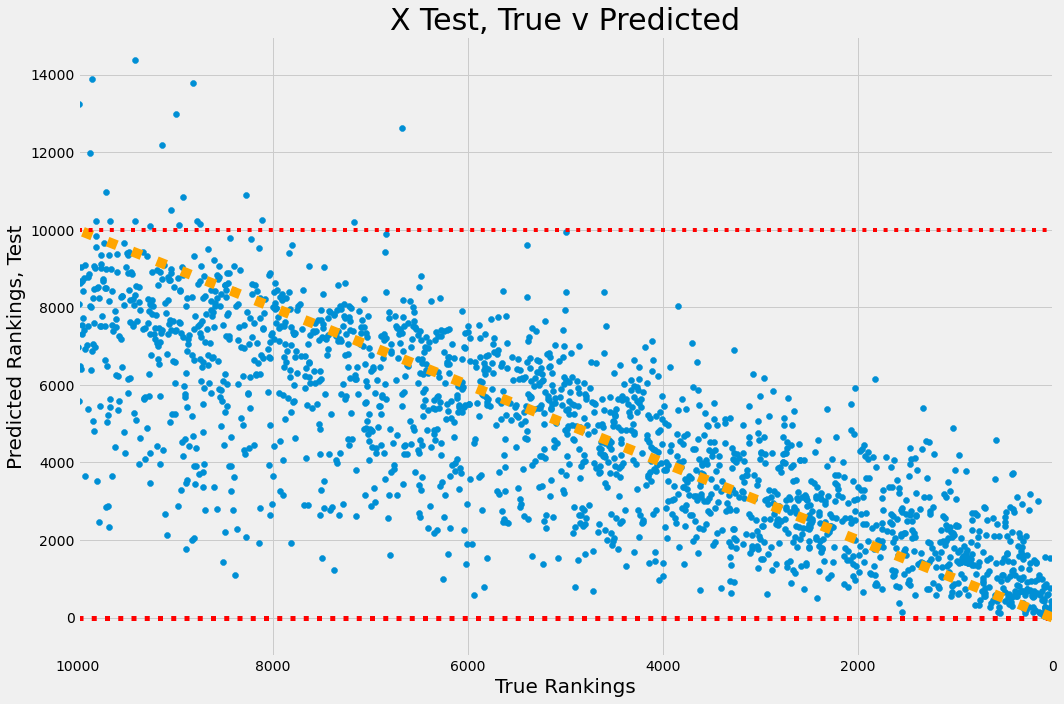

In [254]:
fig, ax = plt.subplots()
plt.xlabel('True Rankings', size = 20)
plt.ylabel('Predicted Rankings, Test', size = 20)
plt.title("X Test, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
plt.grid(axis = 'both')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
ax.set_ylim(-1000,15000)
plt.plot(line_x,line_y, c = 'orange', linestyle=':', linewidth = 10)
ax.axhline(10000, c='r', linestyle = ':')
plt.grid()
plt.tight_layout()
plt.scatter(np.e**(y_test), np.e**predicts).figure.savefig("graphs/FM_test.png")

In [175]:
lr_poly.score(X_poly_test, y_test)

0.6366427101150691

In [176]:
predict_train = lr_poly.predict(X_poly)

(-1000.0, 15000.0)

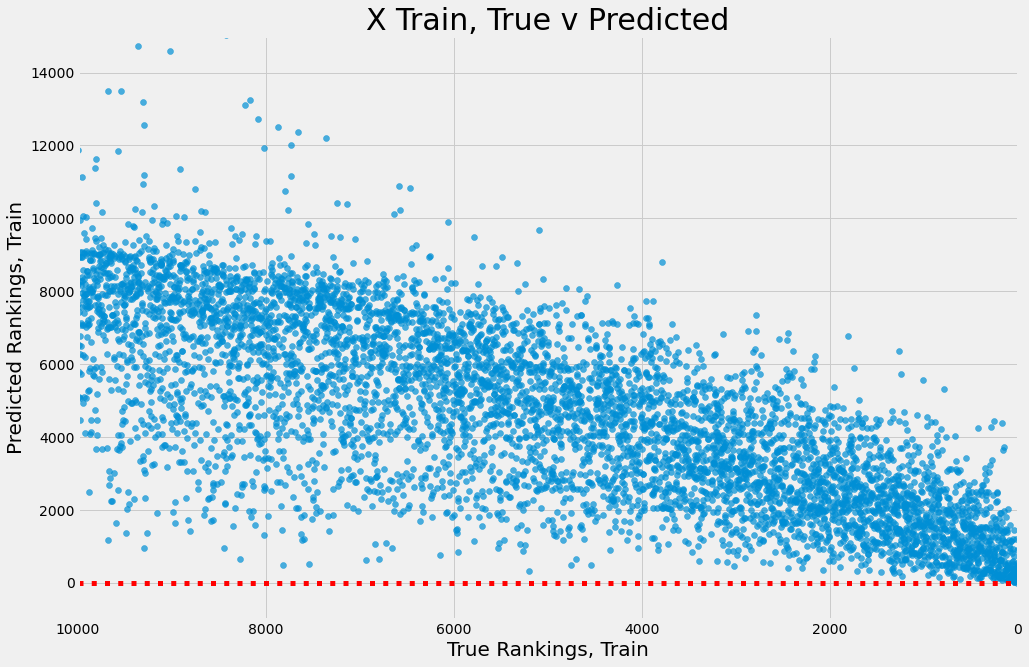

In [177]:
fig, ax = plt.subplots()
plt.scatter(np.e**(y_train), np.e**(predict_train), alpha =.7)
plt.xlabel('True Rankings, Train', size = 20)
plt.ylabel('Predicted Rankings, Train', size =20)
plt.title("X Train, True v Predicted", size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
ax.set_ylim(-1000,15000)

In [178]:
lr_poly.score(X_poly, y_train)

0.6007612615376262

In [179]:
lr_poly.score(X_poly_test, y_test)

0.6366427101150691

### R2 ratio is .94 suggesting decent model with slight underfit

In [180]:
ratio_r2 = lr_poly.score(X_poly, y_train)/lr_poly.score(X_poly_test, y_test)
ratio_r2

0.9436395830701375

### Residual Plots of Poly Fit

In [229]:
resid_test = abs(np.e**(predicts) - np.e**(y_test))
resid_test.head()

rank
1617     5.886989
4952  6804.455805
2168  2887.895189
1090    70.530043
7987   688.682325

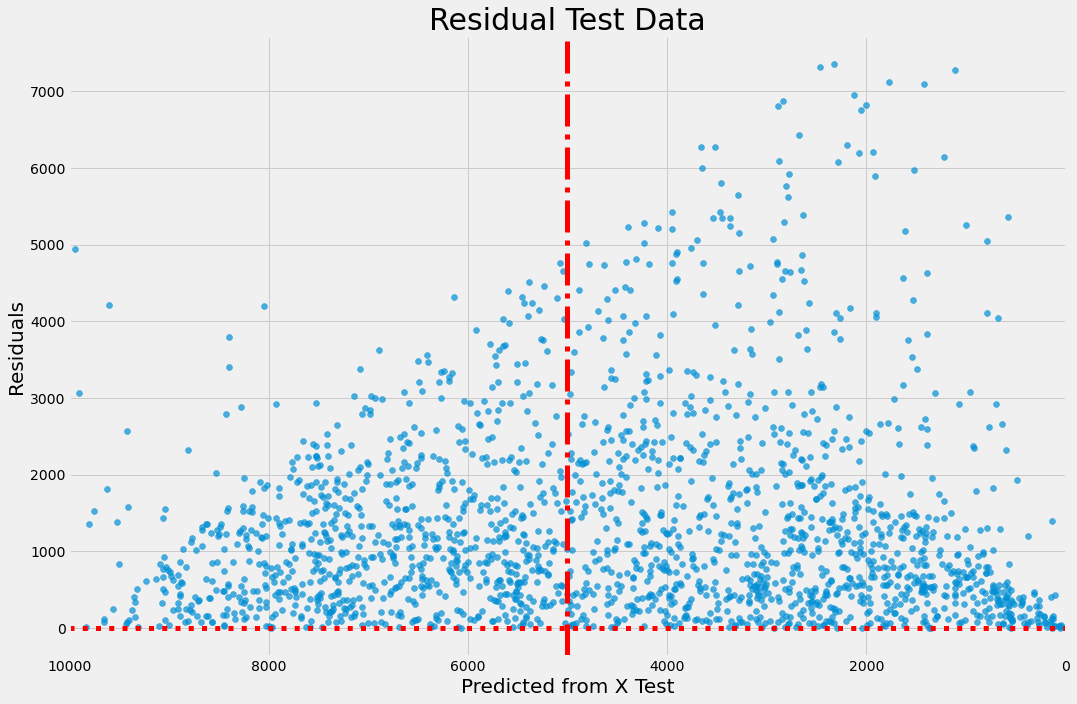

In [233]:
fig, ax = plt.subplots()

plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X Test', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Test Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
plt.tight_layout()
plt.scatter(np.e**predicts, resid_test, alpha=.7).figure.savefig("graphs/test_resid.png")

In [215]:
resid_train = abs(np.e**(predict_train) - np.e**(y_train))

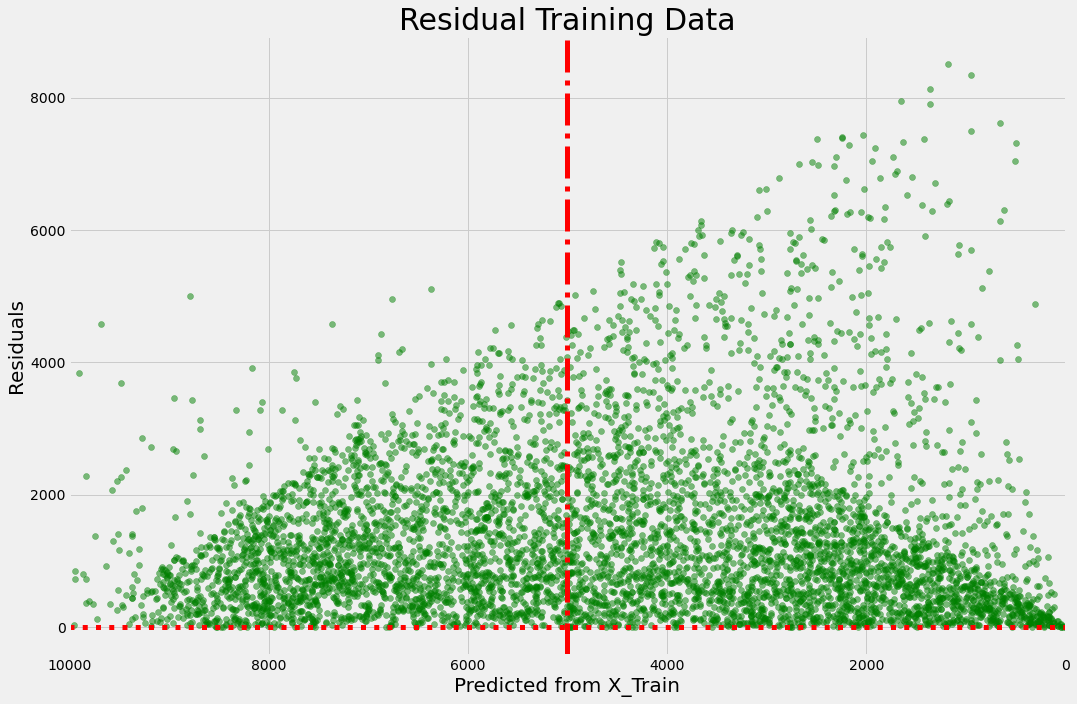

In [236]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted from X_Train', size = 20)
plt.ylabel('Residuals', size = 20)
plt.title('Residual Training Data', size = 30)
ax.axhline(0, linewidth=5, color = 'r',linestyle=':')
ax.axvline(5000, color='r', linewidth = 5, linestyle = '-.')
fig.set_size_inches(15,10)
ax.set_xlim(10000,0)
plt.tight_layout()
plt.scatter(np.e**predict_train, resid_train, alpha=.5, c = 'g').figure.savefig("graphs/TRAIN_resid.png")

### Validate the Poly/Log Model
**It is consistent, validated**

In [238]:
cross_val_score(lr_poly, X_poly, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.56332586, 0.61483437, 0.48020929, 0.57268884, 0.60442809])

In [187]:
Xcons = sm.add_constant(X_poly)
model = sm.OLS(y_train, Xcons) 
results = model.fit()

In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     149.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:57:52   Log-Likelihood:                -5737.9
No. Observations:                6010   AIC:                         1.160e+04
Df Residuals:                    5949   BIC:                         1.201e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1706.1397   1129.463      1.511      0.131    -508.017    3920.297
x1            16.5411      5.896      2.805      0.005       4.982      28.100
x2             0.7315      6.065      0.121      0.904     -11.157      12.620
x3            -7.2589      8.958     -0.810      0.418     -24.821      10.303
x4            -5.6396      7.933     -0.711      0.477     -21.191       9.912
x5           -35.0528     13.426     -2.611      0.009     -61.372      -8.733
x6             0.4865      7.590      0.064      0.949     -14.393      15.366
x7           -17.4768    295.728     -0.059      0.953    -597.211     562.257
x8           635.2232    376.247      1.688      0.091    -102.358    1372.804
x9           197.9157   1873.805      0.106      0.916   -3475.422    3871.253
x10        -4041.4196   2293.539     -1.762      0.078   -8537.588     454.748
x11            0.0164      0.010      1.581      0.114      -0.004       0.037
x12           -0.1403      0.036     -3.910      0.000      -0.211      -0.070
x13           -0.1836      0.033     -5.532      0.000      -0.249      -0.119
x14            0.1349      0.041      3.254      0.001       0.054       0.216
x15           -0.1254      0.051     -2.462      0.014      -0.225      -0.026
x16           -0.1314      0.038     -3.481      0.001      -0.205      -0.057
x17            1.9017      1.338      1.421      0.155      -0.721       4.525
x18            0.2022      1.456      0.139      0.890      -2.652       3.056
x19          -13.9525      8.092     -1.724      0.085     -29.816       1.911
x20           -2.4535      8.786     -0.279      0.780     -19.677      14.770
x21            0.7315      6.065      0.121      0.904     -11.157      12.620
x22            0.0806      0.094      0.861      0.389      -0.103       0.264
x23            0.0513      0.061      0.843      0.399      -0.068       0.171
x24            0.1506      0.145      1.039      0.299      -0.134       0.435
x25            0.0822      0.070      1.170      0.242      -0.056       0.220
x26            3.8791      2.471      1.570      0.116      -0.965       8.723
x27           -4.5275      2.926     -1.547      0.122     -10.264       1.209
x28          -24.2792     15.039     -1.614      0.106     -53.761       5.202
x29           25.7098     17.798      1.445      0.149      -9.181      60.601
x30           -7.2589      8.958     -0.810      0.418     -24.821      10.303
x31            0.1953      0.262      0.745      0.457      -0.319       0.709
x32            0.0225      0.233      0.097      0.923      -0.434       0.478
x33           -0.1574      0.074     -2.125      0.034      -0.303      -0.012
x34           -2.6022      3.076     -0.846      0.398      -8.633       3.428
x35            1.8629      3.761      0.495      0.620      -5.509       9.235
x3